# 1. SET-UP

## 1.1 Import Relevant Libraries

In [2]:
import pandas as pd
import json
import os

## 1.2 Import data

In [3]:
# 1. Load JSON files for each term
def load_mep_data(json_path):
    """Load MEP data from a JSON file."""
    print(f"Loading MEP data from: {json_path}")
    if not os.path.exists(json_path):
        print(f"File not found: {json_path}")
        exit(1)
    
    try:
        with open(json_path, "r", encoding="utf-8") as f:
            file_content = f.read().strip()  # Strip any extra whitespace
            if not file_content:
                raise ValueError("File is empty")
            
            # Validate JSON by loading
            meps_data = json.loads(file_content)  
            print(f"Loaded {len(meps_data)} MEPs successfully.")
            return meps_data
    
    except json.JSONDecodeError as e:
        print(f"JSON decode error at character {e.pos}: {e}")
    except ValueError as e:
        print(f"ValueError: {e}")
    except Exception as e:
        print(f"Failed to load MEP data: {e}")
    exit(1)

# File paths (replace with your paths)
data_9th_term = load_mep_data('C:/Users/Emilia/Documents/Uni Helsinki/Year Three/AMO Freelance/assistant task/9 term/raw data/final national party merged/FINAL_cleaned_9-10term.json')
data_10th_term = load_mep_data('C:/Users/Emilia/Documents/Uni Helsinki/Year Three/AMO Freelance/assistant task/10 term/raw data/national party, 10-11-2024/mep_assistants_national_party.json')

# Convert data to DataFrame
df_9th = pd.json_normalize(data_9th_term)
df_9th['term'] = 9  # Add term info
df_10th = pd.json_normalize(data_10th_term)
df_10th['term'] = 10

# Concatenate dataframes
all_meps = pd.concat([df_9th, df_10th], ignore_index=True)
print(all_meps.columns)

Loading MEP data from: C:/Users/Emilia/Documents/Uni Helsinki/Year Three/AMO Freelance/assistant task/9 term/raw data/final national party merged/FINAL_cleaned_9-10term.json
Loaded 739 MEPs successfully.
Loading MEP data from: C:/Users/Emilia/Documents/Uni Helsinki/Year Three/AMO Freelance/assistant task/10 term/raw data/national party, 10-11-2024/mep_assistants_national_party.json
Loaded 719 MEPs successfully.
Index(['name', 'group', 'country', 'national_party', 'date_scraped',
       'assistants.Accredited assistants', 'assistants.Local assistants',
       'assistants.Service providers', 'assistants.Paying agents',
       'assistants.Accredited assistants (grouping)',
       'assistants.Local assistants (grouping)', 'assistants.Trainees',
       'assistants.Paying agents (grouping)', 'term', 'mep_group',
       'mep_national_party', 'assistants.Assistants to the Quaestorate',
       'assistants.Assistants to the Vice-Presidency'],
      dtype='object')


# 2. STANDARDIZE AND TRANSFORM

## 2.1 Standardize variable names

In [4]:
# Merge 'mep_group' and 'group'
all_meps['group'] = all_meps['mep_group'].combine_first(all_meps['group'])

# Merge 'mep_national_party' and 'national_party'
all_meps['national_party'] = all_meps['mep_national_party'].combine_first(all_meps['national_party'])

# Drop the redundant columns after merging
all_meps.drop(columns=['mep_group', 'mep_national_party'], inplace=True)

# Check the updated DataFrame
print(all_meps.tail())

                            name  \
1453           Nicola ZINGARETTI   
1454             Kosma ZŁOTOWSKI   
1455  Juan Ignacio ZOIDO ÁLVAREZ   
1456               Željana ZOVKO   
1457                  Milan ZVER   

                                                  group   country  \
1453  Group of the Progressive Alliance of Socialist...     Italy   
1454        European Conservatives and Reformists Group    Poland   
1455  Group of the European People's Party (Christia...     Spain   
1456  Group of the European People's Party (Christia...   Croatia   
1457  Group of the European People's Party (Christia...  Slovenia   

                      national_party date_scraped  \
1453             Partito Democratico          NaN   
1454          Prawo i Sprawiedliwość          NaN   
1455                 Partido Popular          NaN   
1456  Hrvatska demokratska zajednica          NaN   
1457   Slovenska demokratska stranka          NaN   

                       assistants.Accredited assi

## 2.2 Filter data frame for analysis

In [5]:
# keep only columns that we will use in analysis
columns_to_keep = [
    'name',
    'national_party', 
    'group', 
    'country', 
    'term', 
    'assistants.Accredited assistants', 
    'assistants.Accredited assistants (grouping)'
]

# filter the DataFrame
meps_apas = all_meps[columns_to_keep]

# rename the columns by removing the 'assistants.' prefix
meps_apas.columns = [col.replace('assistants.', '') for col in meps_apas.columns]

print(meps_apas.columns)

Index(['name', 'national_party', 'group', 'country', 'term',
       'Accredited assistants', 'Accredited assistants (grouping)'],
      dtype='object')


## 2.3 Add political group abbreviations

In [ ]:
# Create a mapping dictionary for party names to abbreviations
group_abbreviations = {
    'Renew Europe Group': 'Renew',
    'European Conservatives and Reformists Group': 'ECR',
    "Group of the European People's Party (Christian Democrats)": 'EPP',
    'Group of the Progressive Alliance of Socialists and Democrats in the European Parliament': 'S&D',
    'Identity and Democracy Group': 'ID',
    'Group of the Greens/European Free Alliance': 'G/EFA',
    'Confederal Group of the European United Left - Nordic Green Left': 'GUE/NGL',
    'Non-attached Members': 'NI',
    'The Left group in the European Parliament - GUE/NGL': 'GUE/NGL',
    'Group of the European United Left - Nordic Green Left': 'GUE/NGL',
    'Patriots for Europe Group': 'Patriots',
    'Europe of Sovereign Nations Group': 'ESN'
}

meps_apas.loc[:, 'group_abbr'] = meps_apas['group'].map(group_abbreviations)
#print(meps_apas['national_party'].unique())
print(meps_apas['group_abbr'].unique())
# #print(meps_apas.columns)

# Iterate through the rows of the DataFrame
for index, row in meps_apas.iterrows():
    if pd.isna(row['group_abbr']):
        print(row['name'])

['Renew' 'ECR' 'EPP' 'S&D' 'ID' 'G/EFA' 'GUE/NGL' 'NI' 'ESN' 'Patriots']


C:\Users\Emilia\AppData\Local\Temp\ipykernel_28252\4206155982.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meps_apas.loc[:, 'group_abbr'] = meps_apas['group'].map(group_abbreviations)


## 2.4 Flatten dataframe

In [7]:
# Function to extract relevant assistants with type information
def extract_assistants(row):
    assistants = []
    # Define relevant groups and their corresponding types
    assistant_groups = {
        'Accredited assistants': 'accredited',
        'Accredited assistants (grouping)': 'accredited_grouping'
    }
    
    for group, assistant_type in assistant_groups.items():
        # Check if the group exists in the row and is a list
        if group in row and isinstance(row[group], list):
            for name in row[group]:
                assistants.append({
                    'assistant_name': name,
                    'mep_name': row['name'],
                    'group_full': row['group'],
                    'group_abbr': row['group_abbr'],
                    'mep_party': row['national_party'],
                    'country': row['country'],
                    'term': row['term'],
                    'assistant_type': assistant_type  # Add assistant type
                })
    return assistants

# Flatten assistants for easier comparison
assistant_data = pd.DataFrame(
    [item for sublist in meps_apas.apply(extract_assistants, axis=1) for item in sublist]
)
print(assistant_data)

                         assistant_name         mep_name  \
0                 Anna Sophia BENGTSSON  Abir AL-SAHLANI   
1               John August HULTENGAARD  Abir AL-SAHLANI   
2                  Tyra Louise LUNDBERG  Abir AL-SAHLANI   
3     Linn Christina Brunhilde OETTERLI  Abir AL-SAHLANI   
4               Sylwia Joanna BETKOWSKA     Adam JARUBAS   
...                                 ...              ...   
7067          Andréa Laure Marie MOULIN    Željana ZOVKO   
7068                         Polona KEK       Milan ZVER   
7069                     Petra SKRINJAR       Milan ZVER   
7070                        Peter SUHEL       Milan ZVER   
7071                     Dominik STRAKL       Milan ZVER   

                                             group_full group_abbr  \
0                                    Renew Europe Group      Renew   
1                                    Renew Europe Group      Renew   
2                                    Renew Europe Group      Renew   

## 2.5 Remove duplicate assistant names

In [8]:
# FIRST REMAP THE NAMES
from fuzzywuzzy import fuzz

def find_similar_names(df, same_term=True):
    similar_pairs = []

    # Iterate through each MEP
    for mep in df['mep_name'].unique():
        # Filter for the current MEP
        if same_term:
            mep_data = df[df['mep_name'] == mep]
        else:
            mep_data = df[df['mep_name'] == mep]  # No term filter for this case

        # Check if the DataFrame contains 'term' column
        term = mep_data['term'].iloc[0] if 'term' in mep_data.columns else "Unknown term"

        names = mep_data['assistant_name'].tolist()

        # Check for similarity between each pair of assistant names
        for i in range(len(names)):
            for j in range(i + 1, len(names)):
                # Calculate similarity score
                score = fuzz.ratio(names[i].lower(), names[j].lower())
                
                # Adjusting the threshold between 90 and 99
                if 75 <= score < 100:  # Use the desired range here
                    similar_pairs.append((names[i], names[j], mep, term))

    return similar_pairs

# Find similar names considering only the same term
#similar_names_same_term = find_similar_names(assistant_data, same_term=True)
#print("Similar assistant names for the same MEP in the same term:")
#for name1, name2, mep in similar_names_same_term:
#    print(f"{name1} and {name2} for {mep} are similar.")

# create remapping based on similar names
name_mapping = {
    "Magdalena NOWACKA": "Magdalena HILLS-NOWACKA", 
    "PAULA SENDIN RODRIGUEZ": "Paula SENDÍN RODRIGUEZ",
    "Eleonora Nikolaycheva GUIGOVA": "Eleonora Nikolaycheva GUIGOVA-NOSKER",
    "Eleonora Nikolaycheva GUIGOVA-NOSKER": "Eleonora Nikolaycheva GUIGOVA-NOSKER",
    "Stefanie SIFFT": "Stefanie SIFFT",
    "Stefanie Gabi SIFFT": "Stefanie SIFFT",
    "Anne-Cecile Juliette GAULT": "Anne-Cecile Juliette GAULT",
    "Anne-Cecile Juliette Rachel GAULT": "Anne-Cecile Juliette GAULT",
    "Sophie Anne Geraldine Marie GUIL": "Sophie Anne Geraldine Marie GUIL",
    "Sophie Anne Geraldine Marie Genevieve GUIL": "Sophie Anne Geraldine Marie GUIL",
    "Ana LOPEZ GONZALEZ": "ANA LÓPEZ GONZÁLEZ",
    "ANA LÓPEZ GONZÁLEZ": "ANA LÓPEZ GONZÁLEZ",
    "Claudia MARTINEZ MUNOZ": "Claudia MARTÍNEZ MUÑOZ",
    "CLAUDIA MARTÍNEZ MUÑOZ": "Claudia MARTÍNEZ MUÑOZ",
    "Maria Mercedes GARCIA MUNOZ": "MARIA MERCEDES GARCIA MUÑOZ",
    "MARIA MERCEDES GARCIA MUÑOZ": "MARIA MERCEDES GARCIA MUÑOZ",
    "Gilles Willy B SEGERS": "GILLES WILLY SEGERS",
    "GILLES WILLY SEGERS": "GILLES WILLY SEGERS",
    "Magdalena GONZALEZ GOZALBO": "Maria Magdalena GONZALEZ GOZALBO",
    "Maria Magdalena GONZALEZ GOZALBO": "Maria Magdalena GONZALEZ GOZALBO",
    "Arturo VILLARROYA GONZALEZ": "Arturo VILLARROYA GONZÁLEZ",
    "Fernando Jose NUNEZ ROBRES PATINO": "Fernando Jose NUNEZ-ROBRES PATINO",
    "Fernando Jose NUNEZ-ROBRES PATINO": "Fernando Jose NUNEZ-ROBRES PATINO",
    "Bibiana CARRETO PEREZ BARBADILLO": "BIBIANA CARRETO PÉREZ BARBADILLO",
    "BIBIANA CARRETO PÉREZ BARBADILLO": "BIBIANA CARRETO PÉREZ BARBADILLO",
    "Magdalena GONZALEZ GOZALBO": "Maria Magdalena GONZALEZ GOZALBO",
    "PAULA SENDIN RODRIGUEZ": "Paula SENDÍN RODRIGUEZ",
    "Paula SENDIN RODRIGUEZ": "Paula SENDÍN RODRIGUEZ",
    "MARIA MERCEDES GARCIA MUNOZ": "MARIA MERCEDES GARCIA MUÑOZ", 
    "ARTURO VILLARROYA GONZALEZ": "Arturo VILLARROYA GONZÁLEZ",
    "ARTURO VILLARROYA GONZALEZ":"Arturo VILLARROYA GONZÁLEZ", 
    "Marlene Elisabeth SEELMAIER": "Marlene Elisabeth STROEHM",          # NAMED CHANGED, CURRENT REMAPPING FOUND IN 10th term 
    "Olivia Jeanna Beatrice ANDERSSON": "Olivia Jeanna Beatrice STÅNGE", # NAMED CHANGED, CURRENT REMAPPING FOUND IN 10th term
    "Sirle ROSENFELDT": "Sirle ROSENFELDT - KOOP",                       # NAMED CHANGED, CURRENT REMAPPING FOUND IN 10th term
    "Saara ANTTINEN": "Saara ANTTINEN-KHUMALO",                          # NAMED CHANGED, CURRENT REMAPPING FOUND IN 10th term
    "Nikolina BRKOVIC": "Nikolina BRKOVIC STANCHEVA", 
    "Josep/Pepe MERCADAL BAQUERO": "Pepe MERCADAL BAQUERO",               # CHANGED HIS NAME TO PEPE
    "Josep MERCADAL BAQUERO": "Pepe MERCADAL BAQUERO" 
}

# remap 
assistant_data['assistant_name'] = assistant_data['assistant_name'].replace(name_mapping)

# check that name remapping worked
# Find similar names considering only the same term
similar_names_same_term = find_similar_names(assistant_data, same_term=True)
print("Similar assistant names for the same MEP in the same term:")
for name1, name2, mep, term in similar_names_same_term:
    print(f"{name1} and {name2} for {mep} in term {term} are similar.")

Similar assistant names for the same MEP in the same term:
Silvia RIGHI and SILVIA DRAGONI for Elisabetta GUALMINI in term 9 are similar.
Silvia RIGHI and SILVIA DRAGONI for Elisabetta GUALMINI in term 9 are similar.
Dirk FRIEDRICH and Pierre FRIEDRICH for Jörg MEUTHEN in term 9 are similar.
Jakub PUSZKARSKI and Jakub KARWANSKI for Magdalena ADAMOWICZ in term 9 are similar.
Michal MOJTO and Michaela MOJTOVÁ for Monika BEŇOVÁ in term 9 are similar.
CARLOS CAMPILLO PEREZ and IGNACIO CAMPILLO PEREZ for Margarita DE LA PISA CARRIÓN in term 9 are similar.
CARLOS CAMPILLO PEREZ and IGNACIO CAMPILLO PEREZ for Margarita DE LA PISA CARRIÓN in term 9 are similar.
Elena MATO MALDONADO and Elena MARTIN ALONSO for Rosa ESTARÀS FERRAGUT in term 9 are similar.
CARLOS CAMPILLO PEREZ and IGNACIO CAMPILLO PEREZ for Jorge BUXADÉ VILLALBA in term 9 are similar.
CARLOS CAMPILLO PEREZ and IGNACIO CAMPILLO PEREZ for Jorge BUXADÉ VILLALBA in term 9 are similar.
CARLOS CAMPILLO PEREZ and IGNACIO CAMPILLO PEREZ

In [9]:
# THEN REMOVE ANY EXACT MATCHES 
# Find exact matches within each MEP and term
#def find_exact_matches(df):
#    exact_matches = {}

    # Group by 'mep_name' and 'term' and find duplicates in 'assistant_name'
#    for (mep, term), group in df.groupby(['mep_name', 'term']):
        # Normalize names by stripping whitespace and converting to lowercase
#        normalized_names = group['assistant_name'].str.strip().str.lower()
        
        # Count occurrences of each normalized name
#        duplicates = normalized_names.value_counts()
        
        # Only keep names that occur more than once
#        duplicate_names = duplicates[duplicates > 1].index.tolist()
        
#        if duplicate_names:
#            exact_matches[(mep, term)] = duplicate_names

#    return exact_matches

# Get exact matches
#exact_matches = find_exact_matches(assistant_data)

# Print out exact matches
#print("Exact matches in MEP categories (for the same term):")
#for (mep, term), names in exact_matches.items():
#    print(f"\nMEP: {mep} | Term: {term}")
#    for name in names:
#        print(f" - {name}")

In [10]:
# Function to find exact matches
def find_exact_matches(df):
    exact_matches = {}

    # Group by 'mep_name', 'term', and 'assistant_type'
    for (mep, term, assistant_type), group in df.groupby(['mep_name', 'term', 'assistant_type']):
        # Normalize names by stripping whitespace and converting to lowercase
        normalized_names = group['assistant_name'].str.strip().str.lower()
        
        # Count occurrences of each normalized name
        duplicates = normalized_names.value_counts()
        
        # Only keep names that occur more than once
        duplicate_names = duplicates[duplicates > 1].index.tolist()
        
        if duplicate_names:
            # Store matches grouped by MEP, term, and assistant_type
            exact_matches[(mep, term, assistant_type)] = duplicate_names

    return exact_matches

# Get exact matches
exact_matches = find_exact_matches(assistant_data)

# Print out exact matches
print("Exact matches in MEP categories (for the same term and assistant_type):")
for (mep, term, assistant_type), names in exact_matches.items():
    print(f"\nMEP: {mep} | Term: {term} | Assistant Type: {assistant_type}")
    for name in names:
        print(f" - {name}")


Exact matches in MEP categories (for the same term and assistant_type):

MEP: Alicia HOMS GINEL | Term: 9 | Assistant Type: accredited
 - daniel diez cecilia
 - alberto bondesio martinez
 - cristian villar prieto
 - elena pereda lagartos
 - joan serra mingot
 - pepe mercadal baquero
 - maria magdalena gonzalez gozalbo

MEP: Alicia HOMS GINEL | Term: 9 | Assistant Type: accredited_grouping
 - alberto bondesio martinez
 - cristian villar prieto
 - elena pereda lagartos
 - daniel diez cecilia
 - pepe mercadal baquero
 - joan serra mingot
 - maria magdalena gonzalez gozalbo

MEP: Antonio LÓPEZ-ISTÚRIZ WHITE | Term: 9 | Assistant Type: accredited_grouping
 - carlos casimiro salvador armendariz

MEP: Esteban GONZÁLEZ PONS | Term: 9 | Assistant Type: accredited_grouping
 - silvia hitos

MEP: Francisco José MILLÁN MON | Term: 9 | Assistant Type: accredited
 - maria maseda varela

MEP: Francisco José MILLÁN MON | Term: 9 | Assistant Type: accredited_grouping
 - carlos casimiro salvador armendar

In [11]:
# Create a mask to drop rows with exact matches
def drop_exact_matches(df, exact_matches):
    # Initialize a mask with all True values
    mask = pd.Series(True, index=df.index)

    # Iterate over the exact matches to identify rows to drop
    for (mep, term, assistant_type), names in exact_matches.items():
        for name in names:
            # Normalize the assistant_name for comparison
            condition = (
                (df['mep_name'] == mep) &
                (df['term'] == term) &
                (df['assistant_type'] == assistant_type) &
                (df['assistant_name'].str.strip().str.lower() == name)
            )
            # Update the mask to exclude matching rows
            mask &= ~condition

    # Return the filtered dataframe
    return df[mask]

# Drop exact matches from the dat
filtered_apas = drop_exact_matches(assistant_data, exact_matches)

# Print the filtered dataset
print(filtered_apas)

# save unique mep names to an excel
#assistant_data.to_excel('assistants_ALL_CORRECT.xlsx', index=False, engine='openpyxl')

                         assistant_name         mep_name  \
0                 Anna Sophia BENGTSSON  Abir AL-SAHLANI   
1               John August HULTENGAARD  Abir AL-SAHLANI   
2                  Tyra Louise LUNDBERG  Abir AL-SAHLANI   
3     Linn Christina Brunhilde OETTERLI  Abir AL-SAHLANI   
4               Sylwia Joanna BETKOWSKA     Adam JARUBAS   
...                                 ...              ...   
7067          Andréa Laure Marie MOULIN    Željana ZOVKO   
7068                         Polona KEK       Milan ZVER   
7069                     Petra SKRINJAR       Milan ZVER   
7070                        Peter SUHEL       Milan ZVER   
7071                     Dominik STRAKL       Milan ZVER   

                                             group_full group_abbr  \
0                                    Renew Europe Group      Renew   
1                                    Renew Europe Group      Renew   
2                                    Renew Europe Group      Renew   

## 2.6 Remove other mistakes

In [12]:
# Replace values in the 'country' column
filtered_apas['country'] = filtered_apas['country'].replace({'PSC-PSOE': 'Spain', 'PNCR': 'Romania'})

# Remove rows where 'assistant_name' is 'Accredited assistants (grouping)'
filtered_apas = filtered_apas[filtered_apas['assistant_name'] != 'Accredited assistants (grouping)']

# Check the updated values in the 'country' column
print(filtered_apas['country'].unique())

['Sweden' 'Poland' 'Romania' 'France' 'Italy' 'Austria' 'Czechia'
 'Germany' 'United Kingdom' 'Greece' 'Malta' 'Spain' 'Denmark' 'Hungary'
 'Bulgaria' 'Latvia' 'Lithuania' 'Estonia' 'Netherlands' 'Belgium'
 'Ireland' 'Croatia' 'Portugal' 'Luxembourg' 'Cyprus' 'Finland' 'Slovakia'
 'Slovenia']


C:\Users\Emilia\AppData\Local\Temp\ipykernel_28252\1950905749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_apas['country'] = filtered_apas['country'].replace({'PSC-PSOE': 'Spain', 'PNCR': 'Romania'})


## 2.7 Save cleaned data 

In [13]:
# save unique mep names to an excel
#filtered_apas.to_excel('assistants_all_CORRECT.xlsx', index=False, engine='openpyxl')

# 3. DATA OVERVIEW

## 3.1 Total Counts

In [14]:
# get total counts
print('Total Assistants')
print(filtered_apas.count())

#get unique values (total)
print('Assistants:')
print(filtered_apas['assistant_name'].nunique())
print('Meps:')
print(filtered_apas['mep_name'].nunique())

Total Assistants
assistant_name    6653
mep_name          6653
group_full        6653
group_abbr        6653
mep_party         6653
country           6653
term              6653
assistant_type    6653
dtype: int64
Assistants:
3128
Meps:
1087


In [15]:
term_9_df = filtered_apas[filtered_apas['term'] == 9]
term_10_df = filtered_apas[filtered_apas['term'] == 10]

In [16]:
print("Term 9 APA totals")
print(term_9_df.count())
print('Accredited Assistants:')
print(term_9_df[term_9_df['assistant_type'] == 'accredited']['assistant_name'].count())
print('Accredited Assistants (Grouped):')
print(term_9_df[term_9_df['assistant_type'] == 'accredited_grouping']['assistant_name'].count())


print("Term 9 APA unique totals")
print('Assistants:')
print(term_9_df['assistant_name'].nunique())
print('Meps:')
print(term_9_df['mep_name'].nunique())
print('Accredited Assistants:')
print(term_9_df[term_9_df['assistant_type'] == 'accredited']['assistant_name'].nunique())
print('Accredited Assistants (Grouped):')
print(term_9_df[term_9_df['assistant_type'] == 'accredited_grouping']['assistant_name'].nunique())

Term 9 APA totals
assistant_name    2390
mep_name          2390
group_full        2390
group_abbr        2390
mep_party         2390
country           2390
term              2390
assistant_type    2390
dtype: int64
Accredited Assistants:
1796
Accredited Assistants (Grouped):
594
Term 9 APA unique totals
Assistants:
1789
Meps:
679
Accredited Assistants:
1687
Accredited Assistants (Grouped):
233


In [17]:
# Get unique assistant names in each category
accredited_names = set(term_9_df[term_9_df['assistant_type'] == 'accredited']['assistant_name'].str.strip().str.lower())
accredited_grouping_names = set(term_9_df[term_9_df['assistant_type'] == 'accredited_grouping']['assistant_name'].str.strip().str.lower())

# Find overlapping names
overlapping_names = accredited_names.intersection(accredited_grouping_names)

# Print results
print(f"Total unique assistant names in dataset: {len(set(term_9_df['assistant_name'].str.strip().str.lower()))}")
print(f"Unique names in 'accredited': {len(accredited_names)}")
print(f"Unique names in 'accredited_grouping': {len(accredited_grouping_names)}")
print(f"Overlapping names between 'accredited' and 'accredited_grouping': {len(overlapping_names)}")
print(f"Expected total (without duplicates): {len(accredited_names) + len(accredited_grouping_names) - len(overlapping_names)}")

# Display overlapping names
#print("\nAssistants in both categories:")
#for name in overlapping_names:
#    print(name)

Total unique assistant names in dataset: 1785
Unique names in 'accredited': 1685
Unique names in 'accredited_grouping': 232
Overlapping names between 'accredited' and 'accredited_grouping': 132
Expected total (without duplicates): 1785


In [18]:
# Count unique names without normalization
raw_unique_count = term_9_df['assistant_name'].nunique()

# Count unique names with normalization
normalized_unique_count = term_9_df['assistant_name'].str.strip().str.lower().nunique()

print(f"Raw unique count (as is): {raw_unique_count}")
print(f"Normalized unique count: {normalized_unique_count}")

Raw unique count (as is): 1789
Normalized unique count: 1785


In [19]:
print("Term 10 APA totals")
print(term_10_df.count())
print(term_10_df[term_10_df['assistant_type'] == 'accredited']['assistant_name'].count())
print(term_10_df[term_10_df['assistant_type'] == 'accredited_grouping']['assistant_name'].count())


print("Term 10 APA unique totals")
print(term_10_df['assistant_name'].nunique())
print(term_10_df['mep_name'].nunique())
print(term_10_df[term_10_df['assistant_type'] == 'accredited']['assistant_name'].nunique())
print(term_10_df[term_10_df['assistant_type'] == 'accredited_grouping']['assistant_name'].nunique())

Term 10 APA totals
assistant_name    4263
mep_name          4263
group_full        4263
group_abbr        4263
mep_party         4263
country           4263
term              4263
assistant_type    4263
dtype: int64
1636
2627
Term 10 APA unique totals
1990
718
1636
354


In [20]:
# Step 1: Filter assistants who have records for both 9th and 10th terms
filtered_apas_9_10 = filtered_apas[filtered_apas['term'].isin([9, 10])]

# Identify assistants who have records in both terms
assistants_9_10 = filtered_apas_9_10.groupby('assistant_name')['term'].nunique()
assistants_both_terms = assistants_9_10[assistants_9_10 == 2].index

# Filter the dataset to only include assistants with both terms
filtered_apas_both_terms = filtered_apas_9_10[filtered_apas_9_10['assistant_name'].isin(assistants_both_terms)]

print("APAS Both Terms")
# Calculate the total unique assistants by group and split by assistant_type
unique_assistants_by_group_and_type = filtered_apas_both_terms.groupby(['group_abbr', 'assistant_type'])['assistant_name'].nunique()

# Convert to a DataFrame for easier viewing (optional)
unique_assistants_by_group_and_type_df = unique_assistants_by_group_and_type.reset_index()
unique_assistants_by_group_and_type_df.columns = ['group_abbr', 'assistant_type', 'unique_assistants']

# Summary of unique assistants overall
print("Total records:", filtered_apas_both_terms.count())
print("Unique assistant names:", filtered_apas_both_terms['assistant_name'].nunique())
print("Unique MEP names:", filtered_apas_both_terms['mep_name'].nunique())

# Split by assistant_type
print("Unique assistants (accredited):", 
      filtered_apas_both_terms[filtered_apas_both_terms['assistant_type'] == 'accredited']['assistant_name'].nunique())
print("Unique assistants (accredited_grouping):", 
      filtered_apas_both_terms[filtered_apas_both_terms['assistant_type'] == 'accredited_grouping']['assistant_name'].nunique())

# Counts for assistant names by type
print("Total assistant names (accredited):", 
      filtered_apas_both_terms[filtered_apas_both_terms['assistant_type'] == 'accredited']['assistant_name'].count())
print("Total assistant names (accredited_grouping):", 
      filtered_apas_both_terms[filtered_apas_both_terms['assistant_type'] == 'accredited_grouping']['assistant_name'].count())

# Display unique assistants by group and type
print("\nUnique assistants by group and type:")
print(unique_assistants_by_group_and_type_df)


APAS Both Terms
Total records: assistant_name    2552
mep_name          2552
group_full        2552
group_abbr        2552
mep_party         2552
country           2552
term              2552
assistant_type    2552
dtype: int64
Unique assistant names: 651
Unique MEP names: 694
Unique assistants (accredited): 624
Unique assistants (accredited_grouping): 130
Total assistant names (accredited): 1203
Total assistant names (accredited_grouping): 1349

Unique assistants by group and type:
   group_abbr       assistant_type  unique_assistants
0         ECR           accredited                 71
1         ECR  accredited_grouping                 20
2         EPP           accredited                182
3         EPP  accredited_grouping                 19
4         ESN           accredited                 10
5         ESN  accredited_grouping                  3
6       G/EFA           accredited                 65
7       G/EFA  accredited_grouping                 23
8     GUE/NGL           ac

# 4 Transform data for visualizations

In [21]:
#Track MEPs across 9th and 10th terms for each assistant
# Group by assistant_name and term and gather MEPs they assisted
assistant_mep_mapping = filtered_apas_both_terms.groupby(['assistant_name', 'term'])[['mep_name', 'mep_party', 'country', 'group_abbr']].apply(
    lambda x: x.to_dict('records')).unstack()

# Step 3: Handle empty lists and compare MEP lists for each assistant between the 9th and 10th terms
def handle_empty_lists(records):
    """Ensure we are working with sets, even for empty lists."""
    if isinstance(records, list):
        # Extract 'mep_name' as a set for comparison
        return {rec['mep_name'] for rec in records if 'mep_name' in rec}
    return set()

# Apply the function to extract MEP sets
assistant_mep_mapping[9] = assistant_mep_mapping[9].apply(handle_empty_lists)
assistant_mep_mapping[10] = assistant_mep_mapping[10].apply(handle_empty_lists)

# Step 4: Compare MEP sets for each assistant and determine if they stayed or moved
assistant_mep_mapping['mep_stayed'] = assistant_mep_mapping[9] == assistant_mep_mapping[10]

# Step 5: Create a column indicating if they stayed or moved
assistant_mep_mapping['mep_change'] = assistant_mep_mapping['mep_stayed'].apply(lambda x: 'Stayed' if x else 'Moved')

# Step 6: Gather additional details for each term
def extract_mep_details(records):
    """Extract MEP details like party, country, and group."""
    return [{k: rec[k] for k in ['mep_name', 'mep_party', 'country', 'group_abbr'] if k in rec} for rec in records]

assistant_mep_mapping['details_9'] = filtered_apas_both_terms[filtered_apas_both_terms['term'] == 9].groupby('assistant_name')[
    ['mep_name', 'mep_party', 'country', 'group_abbr']].apply(lambda x: x.to_dict('records'))
assistant_mep_mapping['details_10'] = filtered_apas_both_terms[filtered_apas_both_terms['term'] == 10].groupby('assistant_name')[
    ['mep_name', 'mep_party', 'country', 'group_abbr']].apply(lambda x: x.to_dict('records'))

# Separate analyses for accredited and accredited_grouping assistants
# Accredited assistants
accredited = filtered_apas_both_terms[filtered_apas_both_terms['assistant_type'] == 'accredited']
accredited_mep_mapping = accredited.groupby(['assistant_name', 'term'])[['mep_name', 'mep_party', 'country', 'group_abbr']].apply(
    lambda x: x.to_dict('records')).unstack()

# Handle empty lists for accredited assistants
accredited_mep_mapping[9] = accredited_mep_mapping[9].apply(handle_empty_lists)
accredited_mep_mapping[10] = accredited_mep_mapping[10].apply(handle_empty_lists)

# Compare and count for accredited assistants
accredited_mep_mapping['mep_stayed'] = accredited_mep_mapping[9] == accredited_mep_mapping[10]
accredited_mep_mapping['mep_change'] = accredited_mep_mapping['mep_stayed'].apply(lambda x: 'Stayed' if x else 'Moved')
accredited_counts = accredited_mep_mapping['mep_change'].value_counts()

# Accredited_grouping assistants
accredited_grouping = filtered_apas_both_terms[filtered_apas_both_terms['assistant_type'] == 'accredited_grouping']
accredited_grouping_mep_mapping = accredited_grouping.groupby(['assistant_name', 'term'])[['mep_name', 'mep_party', 'country', 'group_abbr']].apply(
    lambda x: x.to_dict('records')).unstack()

# Handle empty lists for accredited_grouping assistants
accredited_grouping_mep_mapping[9] = accredited_grouping_mep_mapping[9].apply(handle_empty_lists)
accredited_grouping_mep_mapping[10] = accredited_grouping_mep_mapping[10].apply(handle_empty_lists)

# Compare and count for accredited_grouping assistants
accredited_grouping_mep_mapping['mep_stayed'] = accredited_grouping_mep_mapping[9] == accredited_grouping_mep_mapping[10]
accredited_grouping_mep_mapping['mep_change'] = accredited_grouping_mep_mapping['mep_stayed'].apply(lambda x: 'Stayed' if x else 'Moved')
accredited_grouping_counts = accredited_grouping_mep_mapping['mep_change'].value_counts()

# Output the results
#print(assistant_mep_mapping[['details_9', 'details_10', 'mep_stayed', 'mep_change']])
#print(accredited_mep_mapping[['mep_stayed', 'mep_change']])
#print(accredited_grouping_mep_mapping[['mep_stayed', 'mep_change']])

# count 
print(accredited_counts)
print(accredited_grouping_counts)

mep_change
Moved     342
Stayed    282
Name: count, dtype: int64
mep_change
Moved    130
Name: count, dtype: int64


In [22]:
# Function to handle empty lists and ensure we're working with sets for comparison
def handle_empty_lists(records):
    """Ensure we are working with sets, even for empty lists or missing data."""
    if isinstance(records, list):
        # Extract 'mep_name' as a set for comparison
        return {rec['mep_name'] for rec in records if 'mep_name' in rec}
    return set()  # Return an empty set for non-list or empty lists

# Function to compare MEP sets between term 9 and term 10
def compare_mep_sets(row):
    """Compare MEP sets between terms 9 and 10 and classify movement."""
    mep_9 = row[9]
    mep_10 = row[10]
    
    # Handle missing data: If both lists are empty, classify as "Missing"
    if not mep_9 and not mep_10:
        return 'Missing'
    
    # Check for complete overlap (Stayed case)
    if mep_9 == mep_10:
        return 'Stayed'
    
    # Check for partial overlap (Partially Moved case)
    intersection = mep_9 & mep_10
    if intersection:
        return 'Partially Moved'
    
    # If no overlap, classify as "Moved"
    return 'Moved'

# Step 1: Process each assistant_type individually and track assistants across terms
assistant_type_movement_counts = {}

# Get unique assistant types
assistant_types = filtered_apas_both_terms['assistant_type'].unique()

for assistant_type in assistant_types:
    # Step 2: Filter by assistant_type (process all rows for this type)
    filtered_apas_type = filtered_apas_both_terms[filtered_apas_both_terms['assistant_type'] == assistant_type]
    
    # Step 3: Group by assistant_name and term to gather MEP details for both terms, 
    # keeping duplicates as individual rows (not grouping by assistant_name only)
    assistant_mep_mapping = filtered_apas_type.groupby(['assistant_name', 'term'])[['mep_name', 'mep_party', 'country', 'group_abbr']].apply(
        lambda x: x.to_dict('records')).unstack()
    
    # Apply the function to handle empty lists (convert MEPs to sets for comparison)
    assistant_mep_mapping[9] = assistant_mep_mapping[9].apply(handle_empty_lists)
    assistant_mep_mapping[10] = assistant_mep_mapping[10].apply(handle_empty_lists)
    
    # Apply the comparison function to classify assistants based on their movement
    assistant_mep_mapping['mep_change'] = assistant_mep_mapping.apply(compare_mep_sets, axis=1)
    
    # Calculate counts for each movement category
    mep_change_counts = assistant_mep_mapping['mep_change'].value_counts()
    
    # Store the result for this assistant type
    assistant_type_movement_counts[assistant_type] = mep_change_counts

# Step 4: Output the movement counts for each assistant type
for assistant_type, counts in assistant_type_movement_counts.items():
    print(f"Movement Counts for Assistant Type: {assistant_type}")
    print(counts)
    print()  # Add a newline for better readability
print(assistant_mep_mapping)

Movement Counts for Assistant Type: accredited
mep_change
Moved              332
Stayed             282
Partially Moved     10
Name: count, dtype: int64

Movement Counts for Assistant Type: accredited_grouping
mep_change
Partially Moved    71
Moved              59
Name: count, dtype: int64

term                                                                           9  \
assistant_name                                                                     
AINA ARROM MAYOL               {Iratxe GARCÍA PÉREZ, Nicolás GONZÁLEZ CASARES...   
AMANDA ELISABET ANNIE ARLEKLO                                                 {}   
ANA LÓPEZ GONZÁLEZ             {Iratxe GARCÍA PÉREZ, Nicolás GONZÁLEZ CASARES...   
Agnes POPOVICS                                                                {}   
Alejandro PEINADO GARCIA       {Nicolás GONZÁLEZ CASARES, Javier MORENO SÁNCH...   
...                                                                          ...   
Wander Jeroen Joost WAALS           

In [23]:
# Add details_9 and details_10 for accredited assistants
accredited_mep_mapping['details_9'] = accredited[accredited['term'] == 9].groupby('assistant_name')[
    ['mep_name', 'mep_party', 'country', 'group_abbr']].apply(lambda x: x.to_dict('records'))

accredited_mep_mapping['details_10'] = accredited[accredited['term'] == 10].groupby('assistant_name')[
    ['mep_name', 'mep_party', 'country', 'group_abbr']].apply(lambda x: x.to_dict('records'))

# Add details_9 and details_10 for accredited_grouping assistants
accredited_grouping_mep_mapping['details_9'] = accredited_grouping[accredited_grouping['term'] == 9].groupby('assistant_name')[
    ['mep_name', 'mep_party', 'country', 'group_abbr']].apply(lambda x: x.to_dict('records'))

accredited_grouping_mep_mapping['details_10'] = accredited_grouping[accredited_grouping['term'] == 10].groupby('assistant_name')[
    ['mep_name', 'mep_party', 'country', 'group_abbr']].apply(lambda x: x.to_dict('records'))

# 5. Heatmap visualizations

## 5.1 Movement by Political Group


Debug: Heatmap Data (with totals in column names)
          Accredited Stayed (564)  Accredited Moved (639)  \
ECR                            38                      70   
EPP                           192                     126   
ESN                             1                       9   
G/EFA                          61                      50   
GUE/NGL                        49                      32   
ID                             14                      44   
NI                             12                      26   
Patriots                       22                      30   
Renew                          86                      61   
S&D                            89                     191   

          Grouping Stayed (0)  Grouping Moved (1349)  
ECR                       0.0                     43  
EPP                       0.0                    215  
ESN                       0.0                      4  
G/EFA                     0.0                    100  
GU

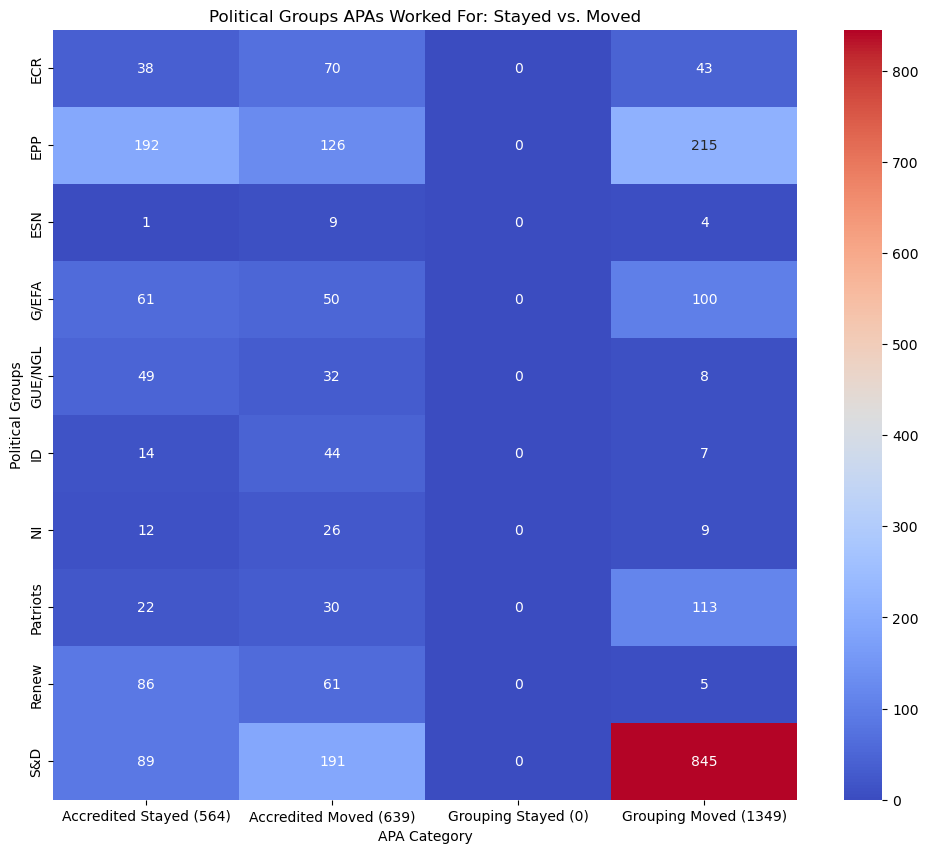

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Helper function to aggregate political group counts
def aggregate_groups(data, status):
    """Aggregate political groups for stayed or moved assistants."""
    # Filter assistants based on 'Stayed' or 'Moved' status
    filtered = data[data['mep_change'] == status]

    # Ensure details_9 and details_10 are lists, handling NaN or other unexpected values
    group_counts = filtered.apply(
        lambda row: [
            rec['group_abbr'] for rec in (row.get('details_9', []) if isinstance(row.get('details_9', []), list) else []) + 
            (row.get('details_10', []) if isinstance(row.get('details_10', []), list) else [])
        ], axis=1
    )

    # Flatten the list of lists and count occurrences of each group
    flat_list = [group for sublist in group_counts for group in sublist]
    
    # Return the value counts of political groups
    return pd.Series(flat_list).value_counts()

# Verify that details_9 and details_10 exist in the accredited mappings
if 'details_9' in accredited_mep_mapping.columns and 'details_10' in accredited_mep_mapping.columns:
    accredited_stayed = aggregate_groups(accredited_mep_mapping, 'Stayed')
    accredited_moved = aggregate_groups(accredited_mep_mapping, 'Moved')
else:
    raise KeyError("details_9 and details_10 are missing in accredited_mep_mapping.")

if 'details_9' in accredited_grouping_mep_mapping.columns and 'details_10' in accredited_grouping_mep_mapping.columns:
    grouping_stayed = aggregate_groups(accredited_grouping_mep_mapping, 'Stayed')
    grouping_moved = aggregate_groups(accredited_grouping_mep_mapping, 'Moved')
else:
    raise KeyError("details_9 and details_10 are missing in accredited_grouping_mep_mapping.")

# Combine counts into a DataFrame for the heatmap
heatmap_data = pd.DataFrame({
    'Accredited Stayed': accredited_stayed,
    'Accredited Moved': accredited_moved,
    'Grouping Stayed': grouping_stayed,
    'Grouping Moved': grouping_moved
}).fillna(0)  # Fill NaN values with 0 for the heatmap

# Calculate totals for each column
totals = heatmap_data.sum(axis=0)

# Update column names to include totals
heatmap_data.columns = [
    f"{col} ({int(totals[col])})" for col in heatmap_data.columns
]

# Debug: Log heatmap data after updating column names
print("\nDebug: Heatmap Data (with totals in column names)")
print(heatmap_data)

# Plot the heatmap (excluding the total row from the color scale)
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.0f')

# Title and labels
plt.title('Political Groups APAs Worked For: Stayed vs. Moved')
plt.ylabel('Political Groups')
plt.xlabel('APA Category')

# Show the plot
plt.show()


Filtered data for status 'Stayed': 282 rows
Row: assistants_list=['Isabel BENJUMEA BENJUMEA', 'Isabel BENJUMEA BENJUMEA'], groups_list=['EPP', 'EPP']
Row: assistants_list=['Elżbieta Katarzyna ŁUKACIJEWSKA', 'Elżbieta Katarzyna ŁUKACIJEWSKA'], groups_list=['EPP', 'EPP']
Row: assistants_list=['Kinga GÁL', 'Kinga GÁL'], groups_list=['EPP', 'Patriots']
Row: assistants_list=['Adrián VÁZQUEZ LÁZARA', 'Adrián VÁZQUEZ LÁZARA'], groups_list=['EPP', 'EPP']
Row: assistants_list=['Krzysztof HETMAN', 'Krzysztof HETMAN'], groups_list=['EPP', 'EPP']
Row: assistants_list=['Lefteris NIKOLAOU-ALAVANOS', 'Lefteris NIKOLAOU-ALAVANOS'], groups_list=['NI', 'NI']
Row: assistants_list=['Özlem DEMIREL', 'Özlem DEMIREL'], groups_list=['GUE/NGL', 'GUE/NGL']
Row: assistants_list=['Krzysztof BREJZA', 'Krzysztof BREJZA'], groups_list=['EPP', 'EPP']
Row: assistants_list=['Raphaël GLUCKSMANN', 'Raphaël GLUCKSMANN'], groups_list=['S&D', 'S&D']
Row: assistants_list=['Tonino PICULA', 'Tonino PICULA'], groups_list=['S&D

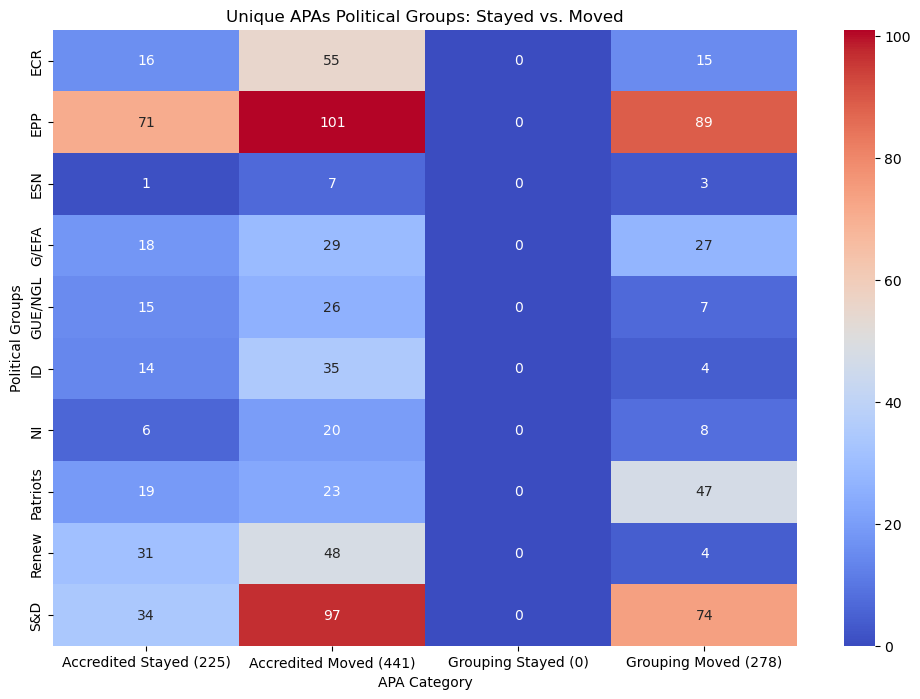

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def aggregate_unique_assistants_debug(data, status):
    """Aggregate unique assistants for stayed or moved assistants with debugging."""
    # Filter assistants based on 'Stayed' or 'Moved' status
    filtered = data[data['mep_change'] == status]
    print(f"\nFiltered data for status '{status}': {len(filtered)} rows")

    # Initialize lists to hold assistants and groups for each row
    assistants = []
    groups = []

    # Extract assistant names and groups for each record
    for _, row in filtered.iterrows():
        # Get assistants from details_9 and details_10, ensuring they are lists
        assistants_list = [
            rec['mep_name'] for rec in (row.get('details_9', []) if isinstance(row.get('details_9', []), list) else []) +
            (row.get('details_10', []) if isinstance(row.get('details_10', []), list) else [])
        ]
        
        # Get political groups corresponding to assistants
        groups_list = [
            rec['group_abbr'] for rec in (row.get('details_9', []) if isinstance(row.get('details_9', []), list) else []) +
            (row.get('details_10', []) if isinstance(row.get('details_10', []), list) else [])
        ]
        
        # Debug: print row-level extraction results
        print(f"Row: assistants_list={assistants_list}, groups_list={groups_list}")

        # If there are assistants, add them to the respective lists
        if assistants_list and groups_list:
            assistants.extend(assistants_list)
            groups.extend(groups_list)

    # Create a DataFrame with group and assistant info
    unique_assistants_df = pd.DataFrame({
        'group': groups,
        'assistant': assistants
    })
    print("\nComplete unique_assistants_df:")
    print(unique_assistants_df)

    # Identify potential overlaps (same assistant in multiple groups)
    assistant_overlap = unique_assistants_df[unique_assistants_df.duplicated(subset=['assistant'], keep=False)]
    print("\nPotential overlapping assistants:")
    print(assistant_overlap)

    # Save overlaps to CSV for further debugging
    #assistant_overlap.to_csv('assistant_overlap_debug.csv', index=False)

    # Get unique assistants per group
    unique_count_per_group = unique_assistants_df.groupby('group')['assistant'].nunique()

    print("\nUnique counts per group:")
    print(unique_count_per_group)

    # Return both DataFrame and unique counts for debugging
    return unique_assistants_df, unique_count_per_group

# Accredited data
accredited_stayed_df, accredited_stayed_unique = aggregate_unique_assistants_debug(accredited_mep_mapping, 'Stayed')
accredited_moved_df, accredited_moved_unique = aggregate_unique_assistants_debug(accredited_mep_mapping, 'Moved')

# Debug: Log totals for accredited assistants 
print("\nDebug: Accredited Stayed")
print(accredited_stayed_df)
print("\nDebug: Accredited Moved")
print(accredited_moved_df)

# Grouping data (similar logic can be applied here if needed)
if 'details_9' in accredited_grouping_mep_mapping.columns and 'details_10' in accredited_grouping_mep_mapping.columns:
    grouping_stayed_df, grouping_stayed_unique = aggregate_unique_assistants_debug(accredited_grouping_mep_mapping, 'Stayed')
    grouping_moved_df, grouping_moved_unique = aggregate_unique_assistants_debug(accredited_grouping_mep_mapping, 'Moved')
else:
    raise KeyError("details_9 and details_10 are missing in accredited_grouping_mep_mapping.")

# Combine the unique assistant counts into a DataFrame for the heatmap
heatmap_data_unique = pd.DataFrame({
    'Accredited Stayed': accredited_stayed_unique,
    'Accredited Moved': accredited_moved_unique,
    'Grouping Stayed': grouping_stayed_unique,
    'Grouping Moved': grouping_moved_unique
}).fillna(0)

# Debug: Log heatmap data before adding totals
print("\nDebug: Heatmap Data (before adding totals)")
print(heatmap_data_unique)

# Calculate totals for each column
totals_unique = heatmap_data_unique.sum(axis=0)

# Update column names to include totals
heatmap_data_unique.columns = [
    f"{col} ({int(totals_unique[col])})" for col in heatmap_data_unique.columns
]

# Debug: Log heatmap data after updating column names
print("\nDebug: Heatmap Data (with totals in column names)")
print(heatmap_data_unique)

# Plot the heatmap (excluding the total row from the color scale)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_unique, annot=True, cmap='coolwarm', fmt='.0f')

# Title and labels
plt.title('Unique APAs Political Groups: Stayed vs. Moved')
plt.ylabel('Political Groups')
plt.xlabel('APA Category')
plt.show()

In [26]:
# Step 1: Group by political group and both assistant and assistant_grouping, count unique assistants
unique_assistants_by_group = filtered_apas_both_terms.groupby(['group_abbr', 'assistant_type'])['assistant_name'].nunique()

# Step 2: Create the result table
result_table = pd.DataFrame(unique_assistants_by_group).reset_index()

# Rename columns for clarity
result_table.columns = ['Political Group', 'Assistant Grouping', 'Unique Assistants Count']

# Display the result table
print(result_table)

   Political Group   Assistant Grouping  Unique Assistants Count
0              ECR           accredited                       71
1              ECR  accredited_grouping                       20
2              EPP           accredited                      182
3              EPP  accredited_grouping                       19
4              ESN           accredited                       10
5              ESN  accredited_grouping                        3
6            G/EFA           accredited                       65
7            G/EFA  accredited_grouping                       23
8          GUE/NGL           accredited                       50
9          GUE/NGL  accredited_grouping                        5
10              ID           accredited                       58
11              ID  accredited_grouping                        6
12              NI           accredited                       34
13              NI  accredited_grouping                        3
14        Patriots       

In [42]:
import pandas as pd

# Filter data for Term 9 and Term 10
term_9 = filtered_apas_both_terms[filtered_apas_both_terms['term'] == 9]
term_10 = filtered_apas_both_terms[filtered_apas_both_terms['term'] == 10]

# Merge on assistant_name and assistant_type to compare across terms
merged = pd.merge(
    term_9,
    term_10,
    on=['assistant_name', 'assistant_type'],
    suffixes=('_term9', '_term10')
)

# Define movement categories
def categorize_movement(row):
    if row['mep_name_term9'] == row['mep_name_term10'] and row['group_abbr_term9'] == row['group_abbr_term10']:
        return "Stayed with same MEP"
    elif row['mep_name_term9'] != row['mep_name_term10'] and row['group_abbr_term9'] == row['group_abbr_term10']:
        return "Stayed with same group, changed MEP"
    elif row['mep_name_term9'] == row['mep_name_term10'] and row['group_abbr_term9'] != row['group_abbr_term10']:
        return "Moved group, stayed with same MEP"
    elif row['mep_name_term9'] != row['mep_name_term10'] and row['group_abbr_term9'] != row['group_abbr_term10']:
        return "Moved group and changed MEP"
    else:
        return "Other"  # Catch-all for unexpected cases

# Apply the categorization
merged['movement_category'] = merged.apply(categorize_movement, axis=1)

# Display the categorized data
print(merged[['assistant_name', 'mep_name_term9', 'mep_name_term10', 'group_abbr_term9', 'group_abbr_term10', 'movement_category']].head())

print(merged.count)

            assistant_name   mep_name_term9  mep_name_term10 group_abbr_term9  \
0    Anna Sophia BENGTSSON  Abir AL-SAHLANI  Abir AL-SAHLANI            Renew   
1     Tyra Louise LUNDBERG  Abir AL-SAHLANI  Abir AL-SAHLANI            Renew   
2  Sylwia Joanna BETKOWSKA     Adam JARUBAS     Adam JARUBAS              EPP   
3   Borys Maria BRZEZINSKI     Adam JARUBAS     Adam JARUBAS              EPP   
4           Lukasz WILKOSZ     Adam JARUBAS     Adam JARUBAS              EPP   

  group_abbr_term10     movement_category  
0             Renew  Stayed with same MEP  
1             Renew  Stayed with same MEP  
2               EPP  Stayed with same MEP  
3               EPP  Stayed with same MEP  
4               EPP  Stayed with same MEP  
<bound method DataFrame.count of                         assistant_name         mep_name_term9  \
0                Anna Sophia BENGTSSON        Abir AL-SAHLANI   
1                 Tyra Louise LUNDBERG        Abir AL-SAHLANI   
2              Sylwia

In [ ]:
# Count occurrences of each movement category
movement_summary = merged['movement_category'].value_counts()



# Group by movement_category and count unique assistant_name
unique_assistant_counts = (
    merged.groupby('movement_category')['assistant_name']
    .nunique()  # Count unique assistant names
    .sort_values(ascending=False)  # Optional: Sort for readability
)

# Display the unique counts
print(unique_assistant_counts)

# Group by both movement_category and assistant_type, and count unique assistant names
unique_assistant_counts_by_type = (
    merged.groupby(['movement_category', 'assistant_type'])['assistant_name']
    .nunique()  # Count unique assistant names
    .unstack(fill_value=0)  # Pivot to get assistant type as columns
)
# Group by both movement_category and assistant_type, and count unique assistant names
movement_by_type = (
    merged.groupby(['movement_category', 'assistant_type'])['assistant_name']
    #.nunique()  # Count unique assistant names
    #.unstack(fill_value=0)  # Pivot to get assistant type as columns
)
# Display the results
print(movement_by_type)

movement_category
Stayed with same group, changed MEP    3416
Stayed with same MEP                    457
Moved group and changed MEP             290
Moved group, stayed with same MEP        61
Name: count, dtype: int64
movement_category
Stayed with same MEP                   311
Stayed with same group, changed MEP    200
Moved group and changed MEP            122
Moved group, stayed with same MEP       52
Name: assistant_name, dtype: int64


In [53]:
# Group by both movement category and assistant type to count both unique assistants and total occurrences
movement_by_type = merged.groupby(['movement_category', 'assistant_type']).agg(
    unique_assistants=('assistant_name', 'nunique'),  # Count unique assistants
    total_occurrences=('assistant_name', 'count')     # Count total occurrences (rows)
).reset_index()

# Display the results
print(movement_by_type)

# Optionally, pivot the table for a cleaner view
movement_by_type_pivot = movement_by_type.pivot(index='movement_category', columns='assistant_type', values=['unique_assistants', 'total_occurrences'])
print(movement_by_type_pivot)

                     movement_category       assistant_type  \
0          Moved group and changed MEP           accredited   
1          Moved group and changed MEP  accredited_grouping   
2    Moved group, stayed with same MEP           accredited   
3    Moved group, stayed with same MEP  accredited_grouping   
4                 Stayed with same MEP           accredited   
5                 Stayed with same MEP  accredited_grouping   
6  Stayed with same group, changed MEP           accredited   
7  Stayed with same group, changed MEP  accredited_grouping   

   unique_assistants  total_occurrences  
0                103                107  
1                 19                183  
2                 37                 37  
3                 15                 24  
4                255                255  
5                 56                202  
6                143                149  
7                 57               3267  
                                    unique_assistants 

In [54]:
import plotly.graph_objects as go

# Prepare Sankey data: Use movement_category to filter unique flows
group_flows = merged.groupby(['group_abbr_term9', 'group_abbr_term10', 'movement_category']).size().reset_index(name='count')

# Filter only unique assistant movements
#group_flows_unique = group_flows.groupby(['group_abbr_term9', 'group_abbr_term10']).sum().reset_index()

# Create a mapping for group labels to indices
labels = list(set(group_flows['group_abbr_term9']) | set(group_flows['group_abbr_term10']))
label_to_index = {label: i for i, label in enumerate(labels)}

# Map group abbreviations to indices
sources = group_flows['group_abbr_term9'].map(label_to_index)
targets = group_flows['group_abbr_term10'].map(label_to_index)
values = group_flows['count']

# Generate Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

fig.update_layout(
    title_text="Group Transitions (Aligned with Movement Categories)",
    font_size=10
)
fig.show()


Filtered data for status 'Moved': 342 rows
           assistant group_term9 group_term10
0  Alicia HOMS GINEL         S&D         None
1       Alice KUHNKE       G/EFA         None
2  Alicia HOMS GINEL         S&D         None
3         Andor DELI         EPP     Patriots
4   Annamária VICSEK         EPP     Patriots

Filtered data for status 'Moved': 130 rows
                     assistant group_term9 group_term10
0            Alicia HOMS GINEL         S&D          S&D
1          Iratxe GARCÍA PÉREZ         S&D          S&D
2        Javier MORENO SÁNCHEZ         S&D          S&D
3  Juan Fernando LÓPEZ AGUILAR         S&D          S&D
4                  Lina GÁLVEZ         S&D          S&D
Instances with NaN values:
              assistant group_term9 group_term10
0    Alicia HOMS GINEL         S&D         None
1         Alice KUHNKE       G/EFA         None
2    Alicia HOMS GINEL         S&D         None
12        Sándor RÓNAI         S&D         None
17         César LUENA         S

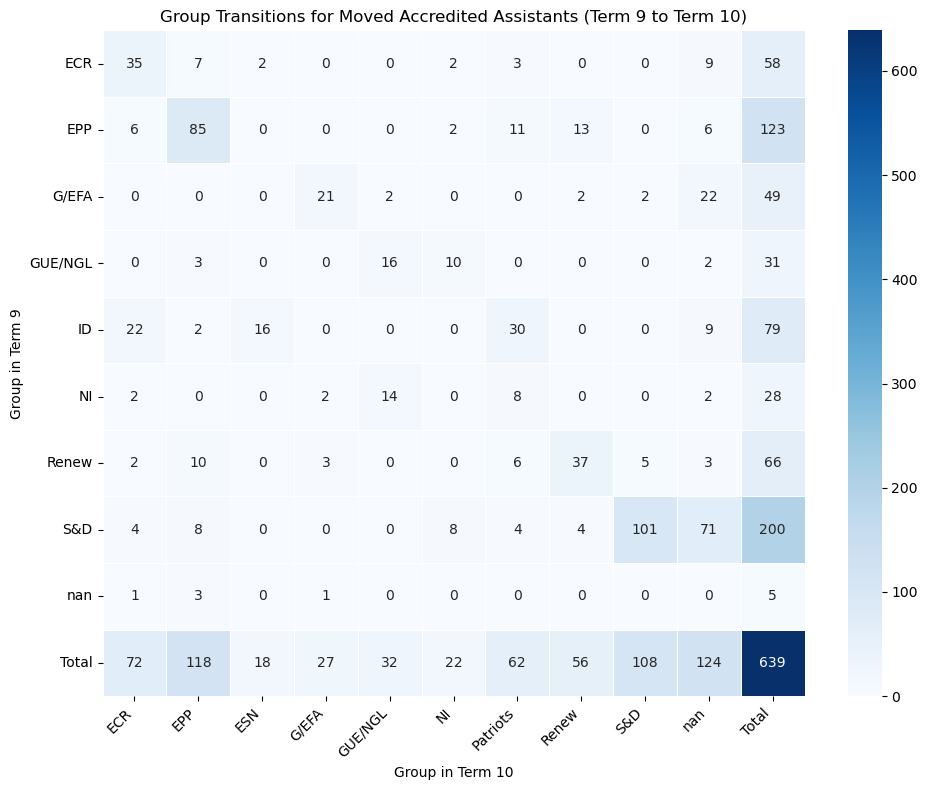

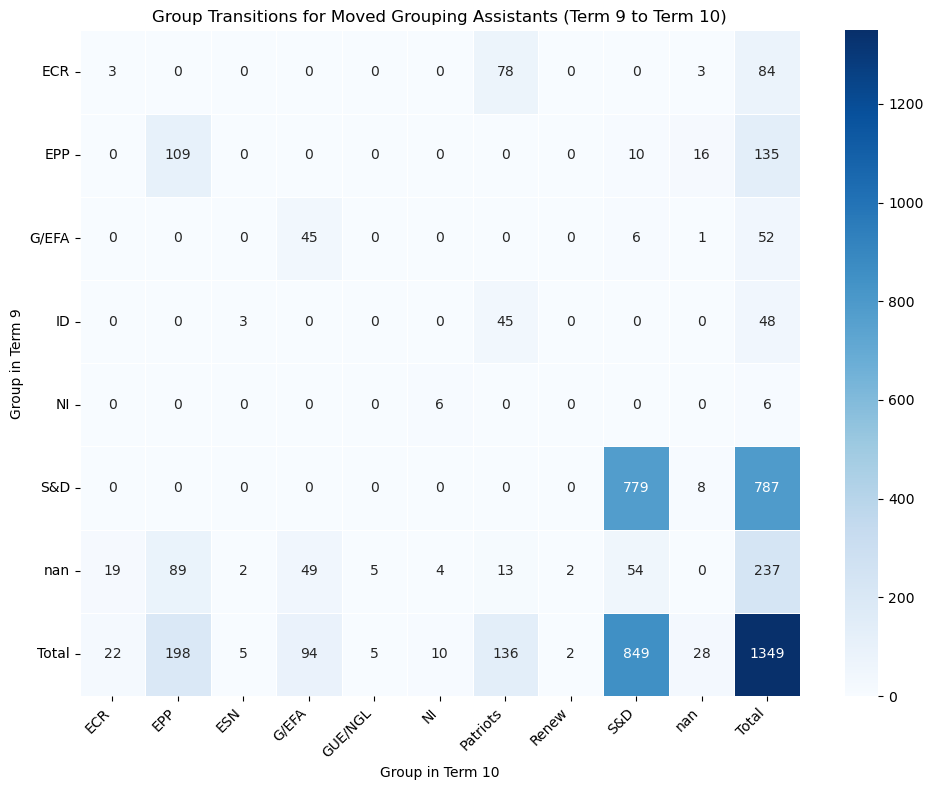

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the function to aggregate assistants based on their status (moved or stayed)
def aggregate_unique_assistants_debug(data, status):
    """Aggregate unique assistants for stayed or moved assistants with debugging, including term group info."""
    # Filter assistants based on 'Stayed' or 'Moved' status
    filtered = data[data['mep_change'] == status]
    print(f"\nFiltered data for status '{status}': {len(filtered)} rows")

    # Initialize lists to hold assistants and groups for each row
    assistants = []
    groups_term9 = []  # Group for Term 9
    groups_term10 = []  # Group for Term 10

    # Extract assistant names and groups for each record
    for _, row in filtered.iterrows():
        # Get assistants from details_9 and details_10, ensuring they are lists
        assistants_list = [
            rec['mep_name'] for rec in (row.get('details_9', []) if isinstance(row.get('details_9', []), list) else []) +
            (row.get('details_10', []) if isinstance(row.get('details_10', []), list) else [])
        ]
        
        # Get political groups corresponding to assistants for Term 9 and Term 10
        groups_list_term9 = [
            rec['group_abbr'] for rec in (row.get('details_9', []) if isinstance(row.get('details_9', []), list) else [])
        ]
        
        groups_list_term10 = [
            rec['group_abbr'] for rec in (row.get('details_10', []) if isinstance(row.get('details_10', []), list) else [])
        ]
        
        # If there are assistants, add them to the respective lists
        for assistant in assistants_list:
            assistants.append(assistant)
            
            # If there is no corresponding group for Term 9 or Term 10, add None
            groups_term9.append(groups_list_term9[0] if groups_list_term9 else None)
            groups_term10.append(groups_list_term10[0] if groups_list_term10 else None)

    # Create a DataFrame with group and assistant info for both terms
    unique_assistants_df = pd.DataFrame({
        'assistant': assistants,
        'group_term9': groups_term9,
        'group_term10': groups_term10
    })

    return unique_assistants_df

# Apply the aggregation function for 'Moved' assistants
accredited_moved_df = aggregate_unique_assistants_debug(accredited_mep_mapping, 'Moved')
print(accredited_moved_df.head())  # Check the result

# Similarly, we would handle 'grouping' assistants data
grouping_moved_df = aggregate_unique_assistants_debug(accredited_grouping_mep_mapping, 'Moved')
print(grouping_moved_df.head())  # Check the result

# Define the function to plot the transition heatmap for moved assistants
def plot_transition_heatmap_for_moved(data, title):
    """Plot a heatmap showing the group transitions for moved assistants."""
    # Step 2: Create a transition matrix using crosstab for group transitions
    transition_matrix = pd.crosstab(data['group_term9'], data['group_term10'], dropna=False)
    
    # Step 3: Add totals for rows and columns
    transition_matrix['Total'] = transition_matrix.sum(axis=1)
    transition_matrix.loc['Total'] = transition_matrix.sum(axis=0)
    
    # Step 4: Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(transition_matrix, annot=True, cmap='Blues', fmt='d', cbar=True, linewidths=0.5)
    
    # Step 5: Customize the plot
    plt.title(title)
    plt.xlabel('Group in Term 10')
    plt.ylabel('Group in Term 9')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    # Show the plot
    plt.tight_layout()
    plt.show()


# Print all rows where 'group_term9' or 'group_term10' has NaN values
nan_instances = accredited_moved_df[accredited_moved_df['group_term9'].isna() | accredited_moved_df['group_term10'].isna()]
print("Instances with NaN values:\n", nan_instances)

# Plotting for 'accredited' assistants (moved)
plot_transition_heatmap_for_moved(accredited_moved_df, 'Group Transitions for Moved Accredited Assistants (Term 9 to Term 10)')

# Plotting for 'grouping' assistants (moved)
plot_transition_heatmap_for_moved(grouping_moved_df, 'Group Transitions for Moved Grouping Assistants (Term 9 to Term 10)')

In [55]:
import pandas as pd

# Save the rows with NaN values to CSV for 'accredited' assistants
nan_instances_accredited = accredited_moved_df[accredited_moved_df['group_term9'].isna() | accredited_moved_df['group_term10'].isna()]
nan_instances_accredited.to_csv('accredited_moved_nan_instances.csv', index=False)

# Save the rows with NaN values to CSV for 'grouping' assistants
nan_instances_grouping = grouping_moved_df[grouping_moved_df['group_term9'].isna() | grouping_moved_df['group_term10'].isna()]
nan_instances_grouping.to_csv('grouping_moved_nan_instances.csv', index=False)

# Print confirmation that CSVs are saved
print("NaN instances for 'accredited' assistants saved to 'accredited_moved_nan_instances.csv'.")
print("NaN instances for 'grouping' assistants saved to 'grouping_moved_nan_instances.csv'.")

NaN instances for 'accredited' assistants saved to 'accredited_moved_nan_instances.csv'.
NaN instances for 'grouping' assistants saved to 'grouping_moved_nan_instances.csv'.


C:\Users\Emilia\AppData\Local\Temp\ipykernel_28252\1292126978.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moved_assistants['mep_group_movement'] = moved_assistants['group_abbr_term9'] + " -> " + moved_assistants['group_abbr_term10']


mep_group_movement   ECR -> ECR  ECR -> EPP  ECR -> ESN  ECR -> NI  \
assistant_type                                                       
accredited                   17           3           1          1   
accredited_grouping           2           0           0          0   

mep_group_movement   ECR -> Patriots  EPP -> ECR  EPP -> EPP  EPP -> GUE/NGL  \
assistant_type                                                                 
accredited                         2           3          44               0   
accredited_grouping               90           0         278               1   

mep_group_movement   EPP -> NI  EPP -> Patriots  ...  Renew -> G/EFA  \
assistant_type                                   ...                   
accredited                   1                5  ...               1   
accredited_grouping          0                0  ...               0   

mep_group_movement   Renew -> Patriots  Renew -> Renew  Renew -> S&D  \
assistant_type                       

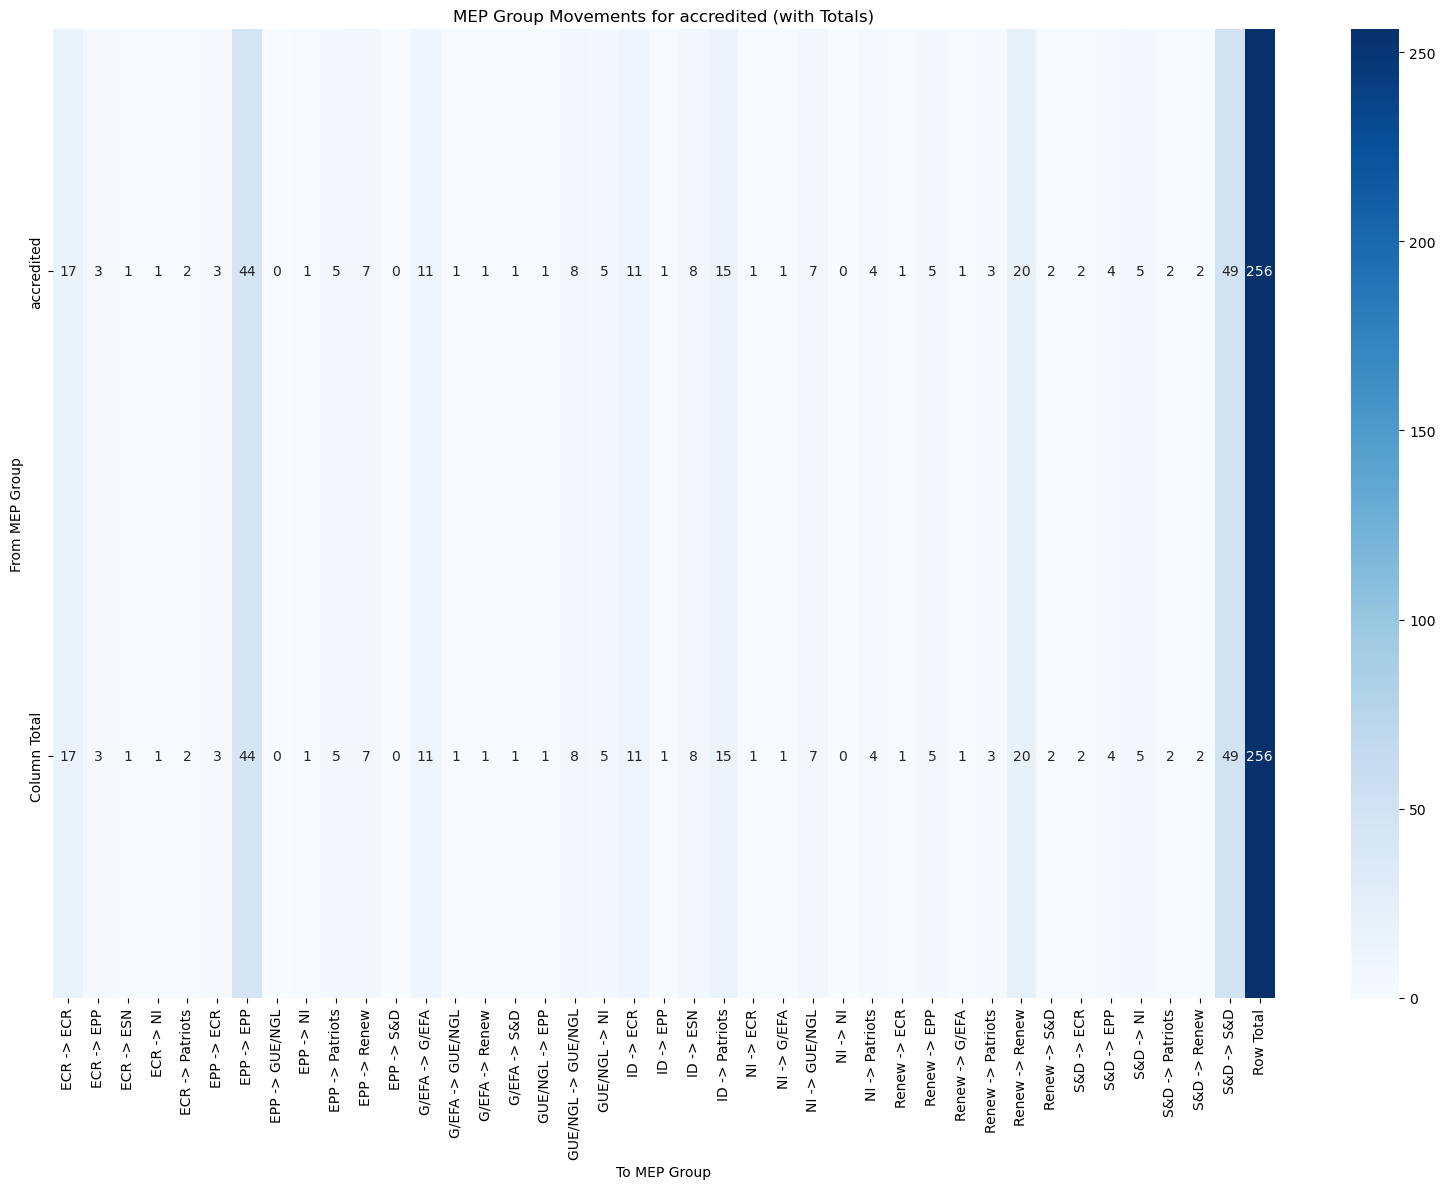

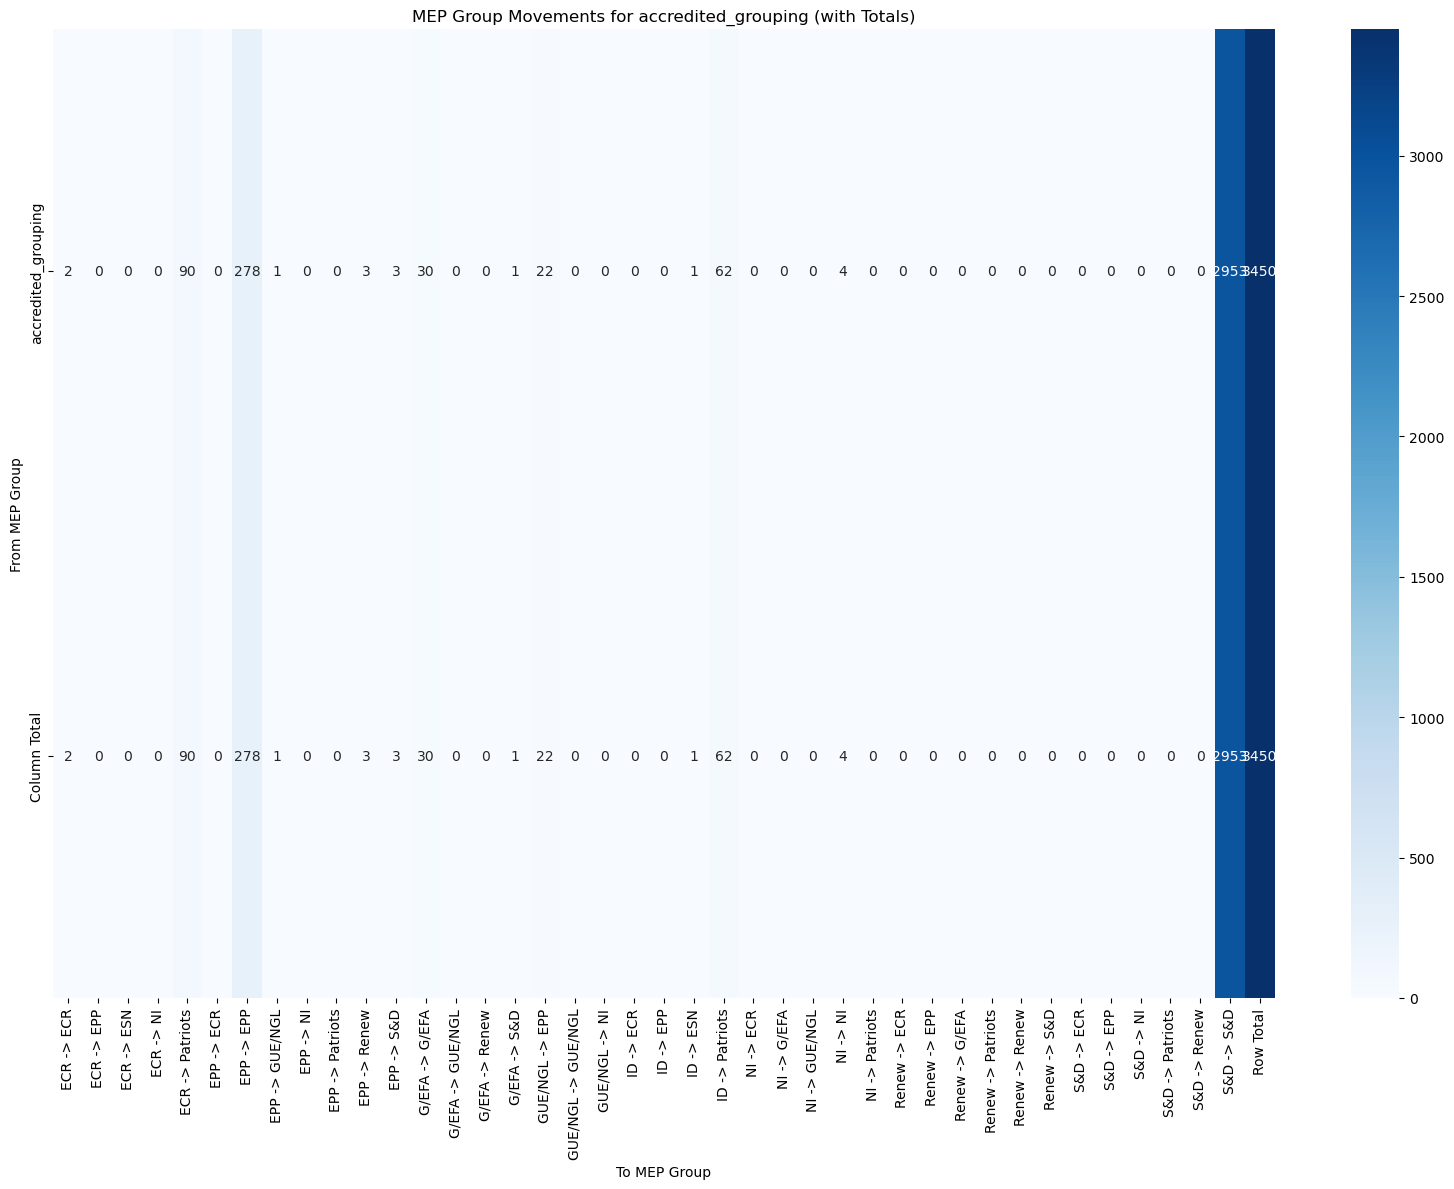

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split the dataframe into Term 9 and Term 10
term_9 = filtered_apas_both_terms[filtered_apas_both_terms['term'] == 9]
term_10 = filtered_apas_both_terms[filtered_apas_both_terms['term'] == 10]

# Merge the data on 'assistant_name' and 'assistant_type' to compare Term 9 and Term 10
merged = pd.merge(
    term_9,
    term_10,
    on=['assistant_name', 'assistant_type'],
    suffixes=('_term9', '_term10')
)

# Filter for assistants who moved to a different MEP between terms
moved_assistants = merged[merged['mep_name_term9'] != merged['mep_name_term10']]

# Create a column to track movement between MEP groups
moved_assistants['mep_group_movement'] = moved_assistants['group_abbr_term9'] + " -> " + moved_assistants['group_abbr_term10']

# Group and visualize data
# Split by assistant_type and map movements
results = moved_assistants.groupby('assistant_type')['mep_group_movement'].value_counts().unstack(fill_value=0)

print(results)

# Add totals for each assistant_type
results_with_totals = results.copy()
results_with_totals['Row Total'] = results_with_totals.sum(axis=1)  # Add row-wise totals
results_with_totals.loc['Column Total'] = results_with_totals.sum(axis=0)  # Add column-wise totals

print(results_with_totals)  # For verification

# Visualization: Heatmaps with totals included
for assistant_type in results.index:
    # Prepare data with totals for this assistant_type
    assistant_data = results.loc[assistant_type].to_frame().T
    assistant_data['Row Total'] = assistant_data.sum(axis=1)  # Row-wise total for current type
    assistant_data.loc['Column Total'] = assistant_data.sum(axis=0)  # Column-wise total for current type

    plt.figure(figsize=(16, 12))
    sns.heatmap(
        assistant_data,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=True
    )
    plt.title(f'MEP Group Movements for {assistant_type} (with Totals)')
    plt.ylabel('From MEP Group')
    plt.xlabel('To MEP Group')
    plt.tight_layout()
    plt.show()


## 5.2 By National Party

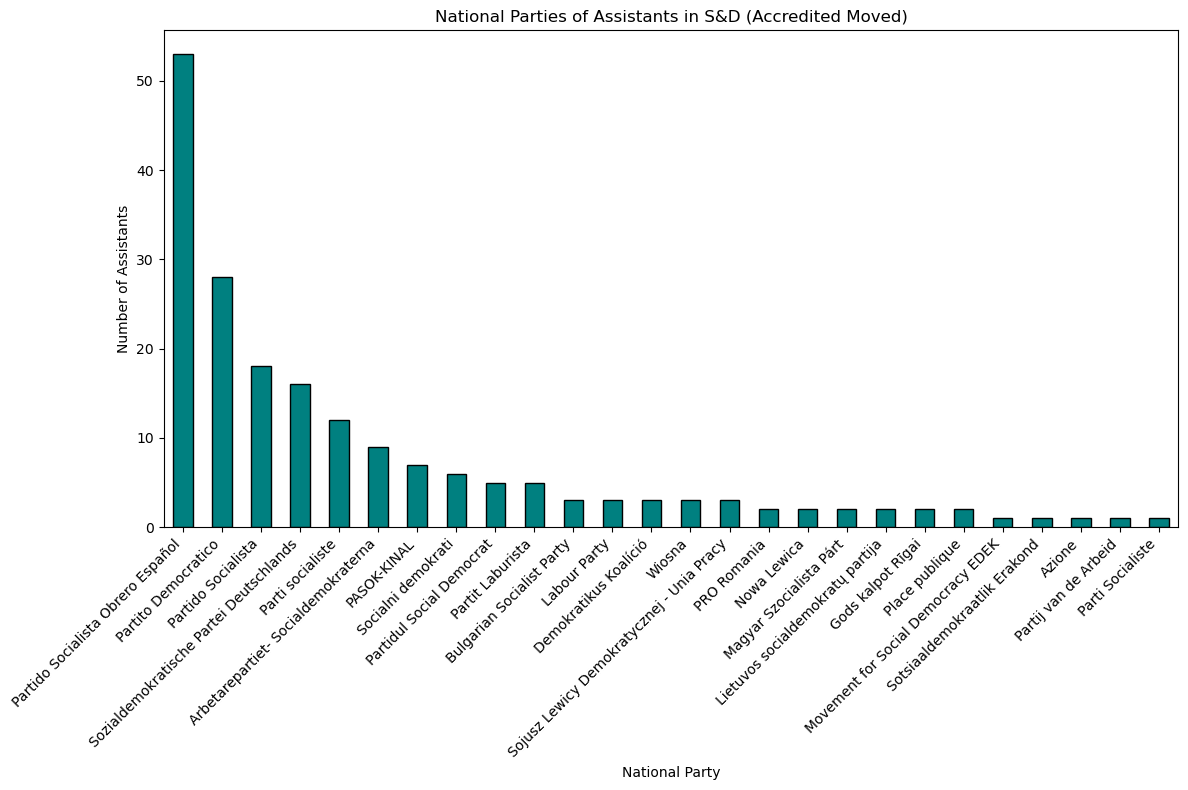

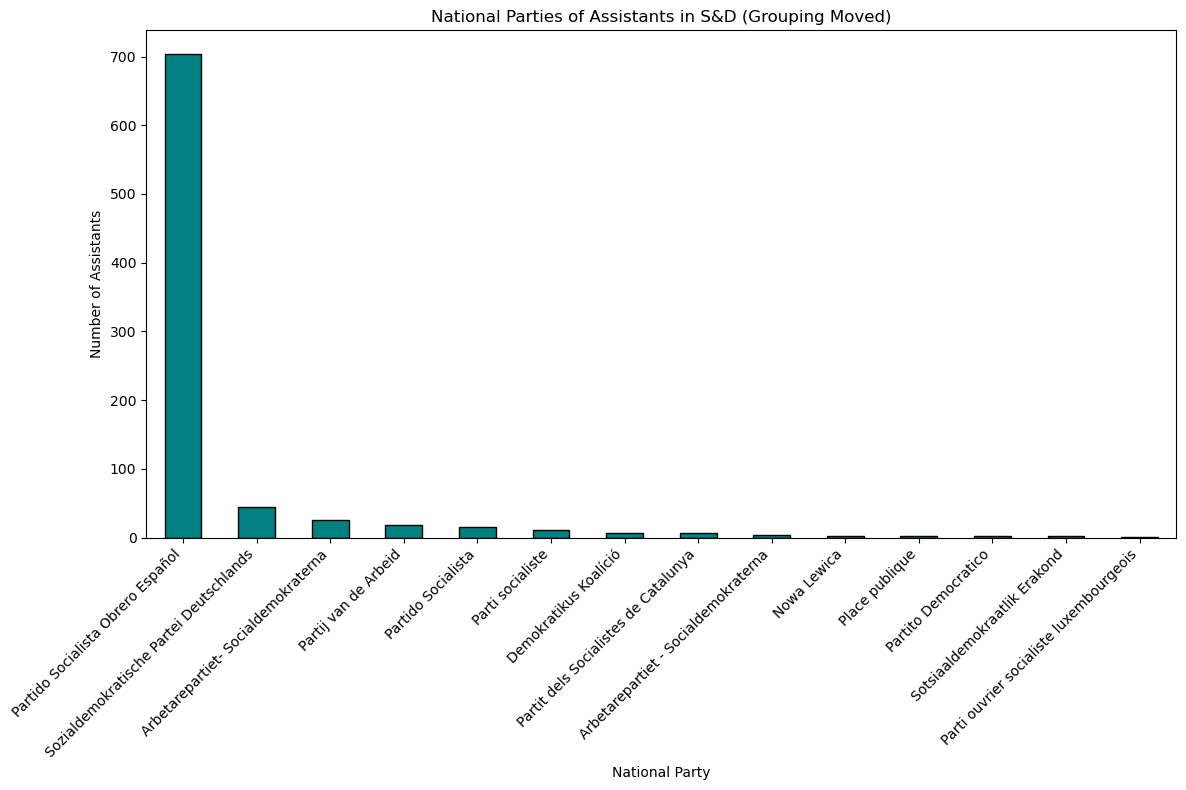

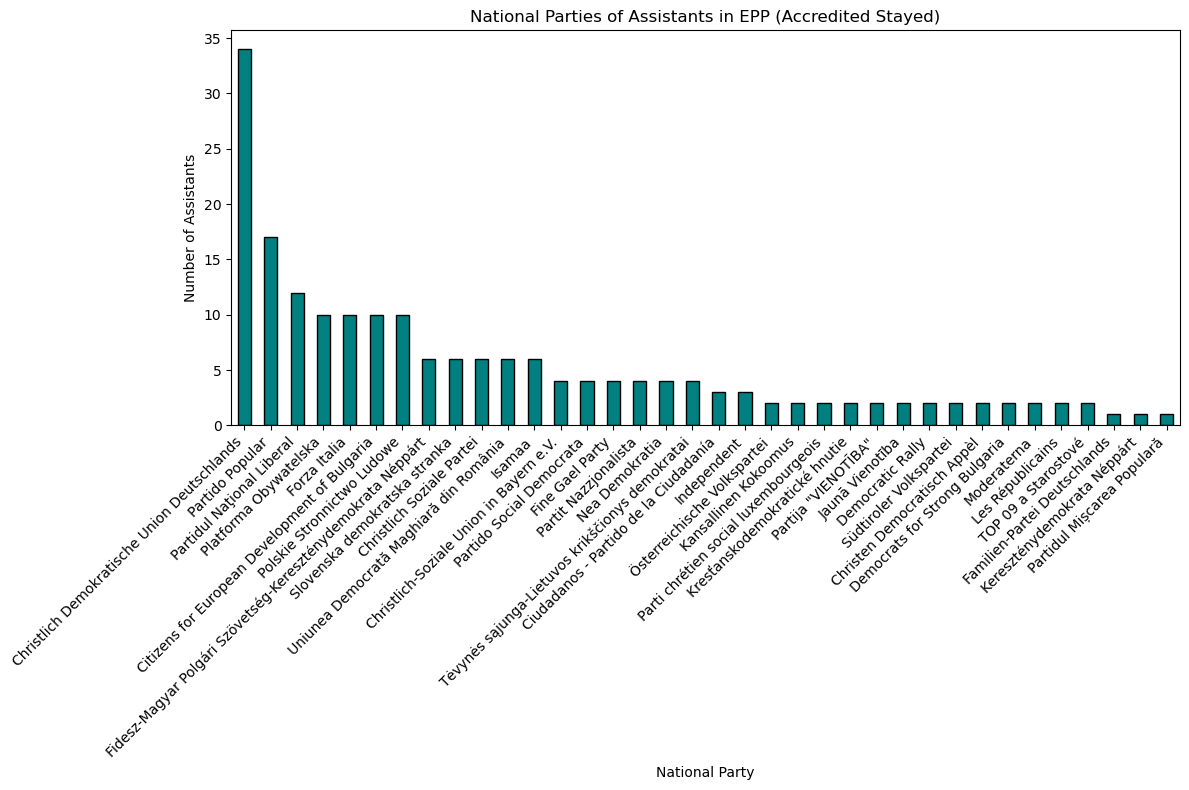

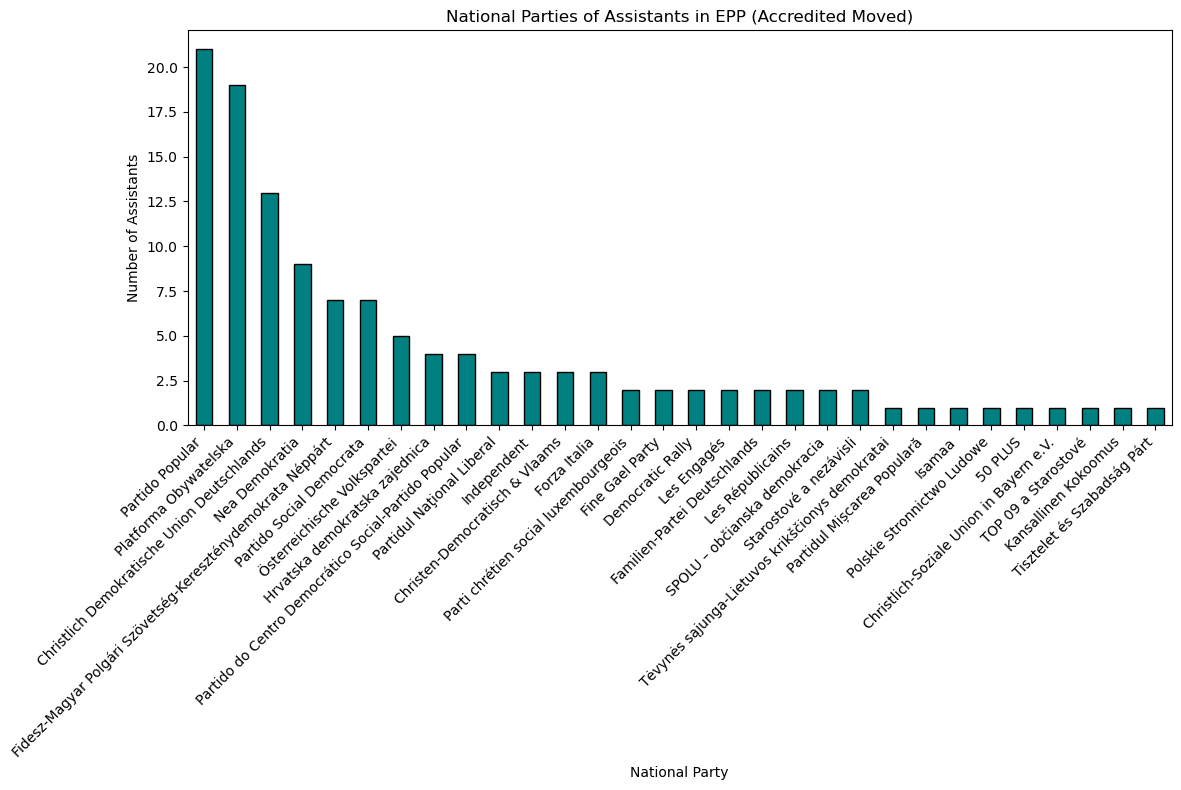

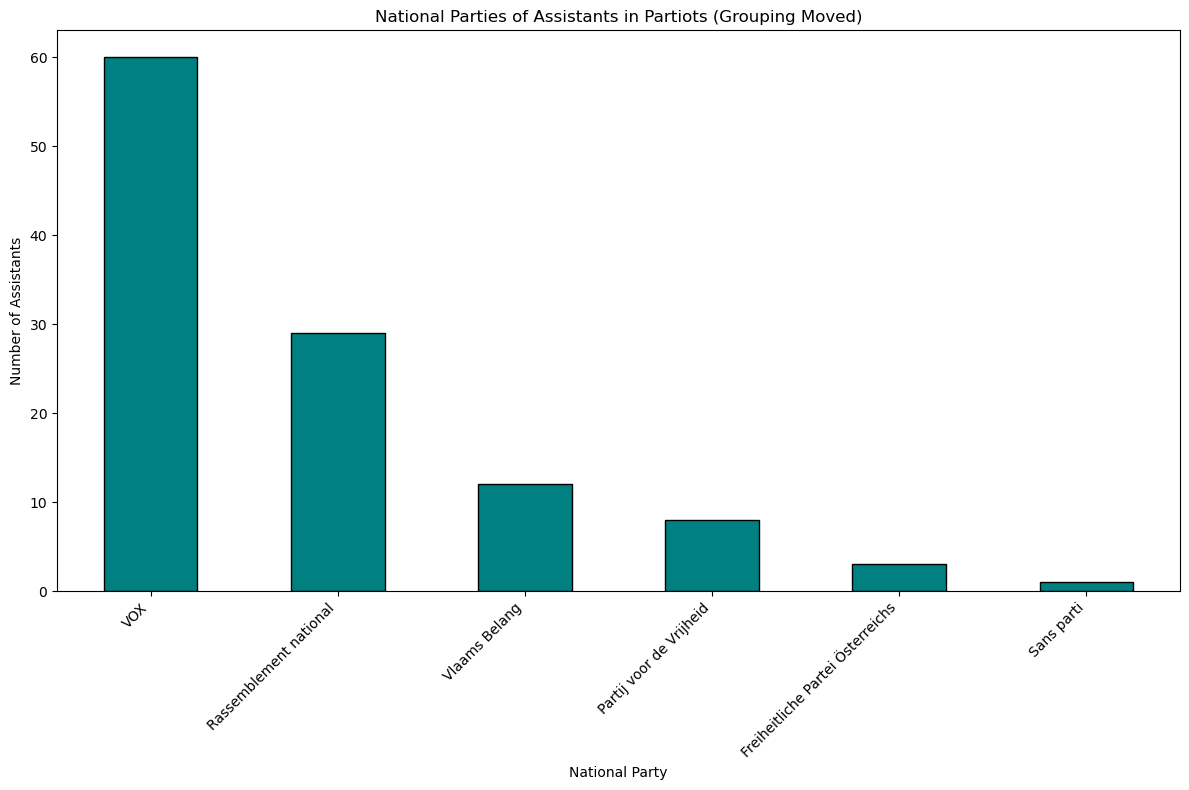

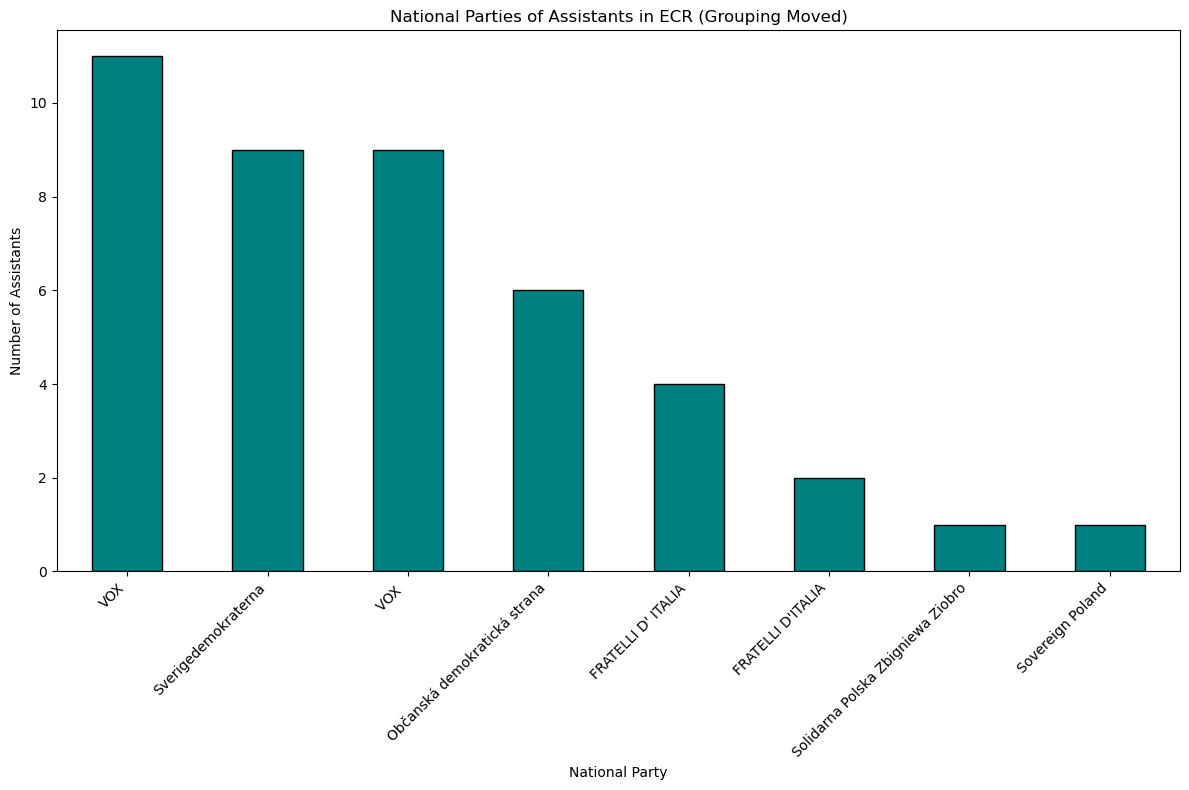

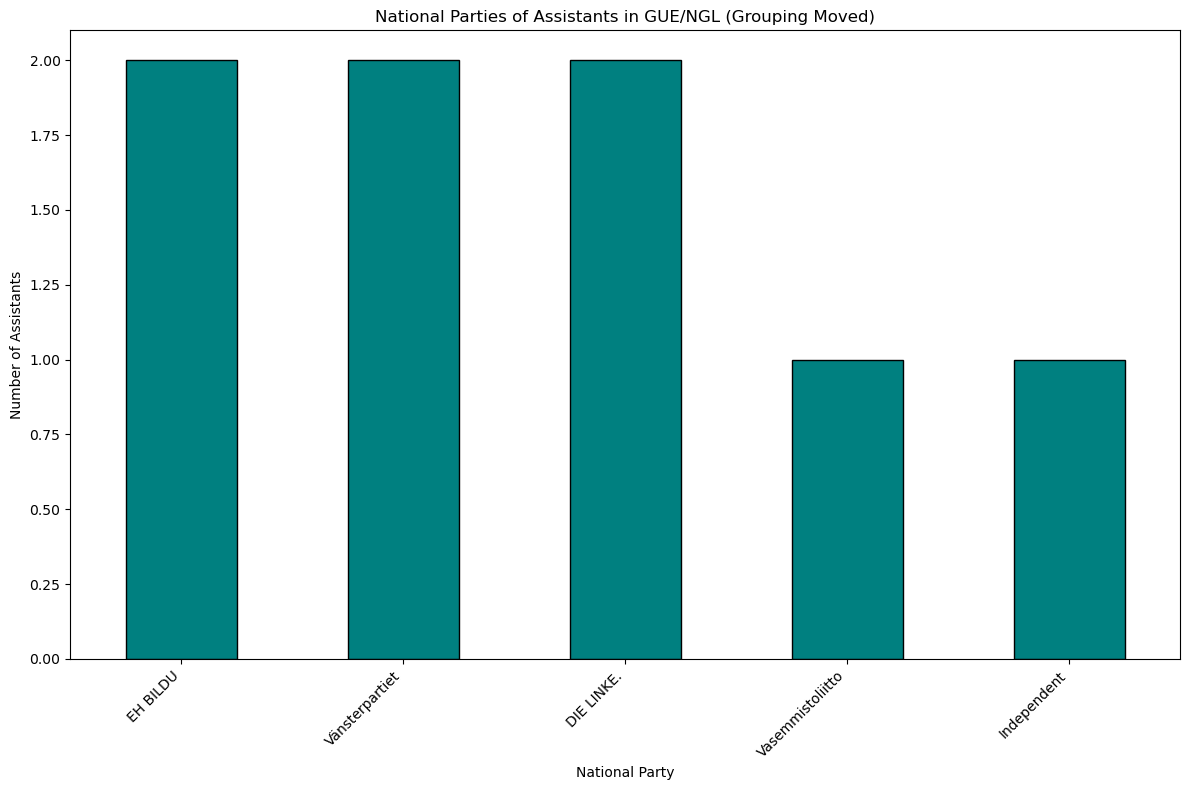

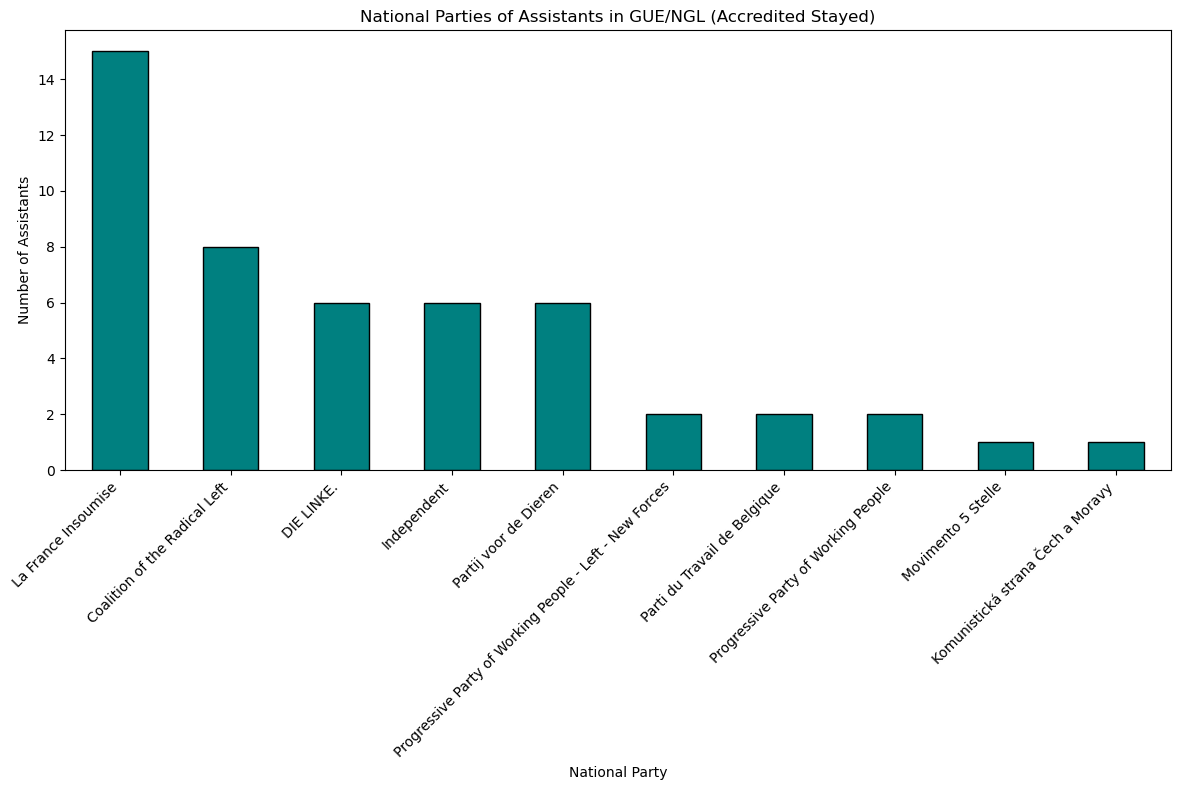

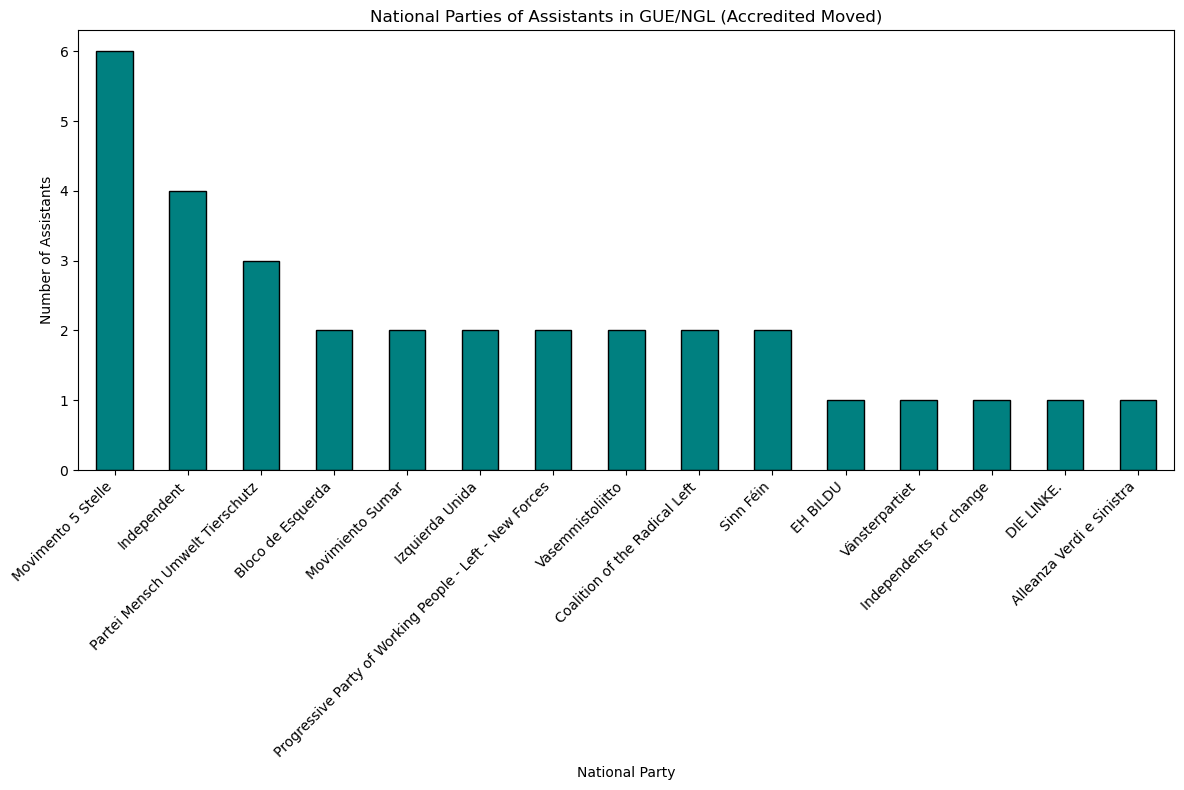

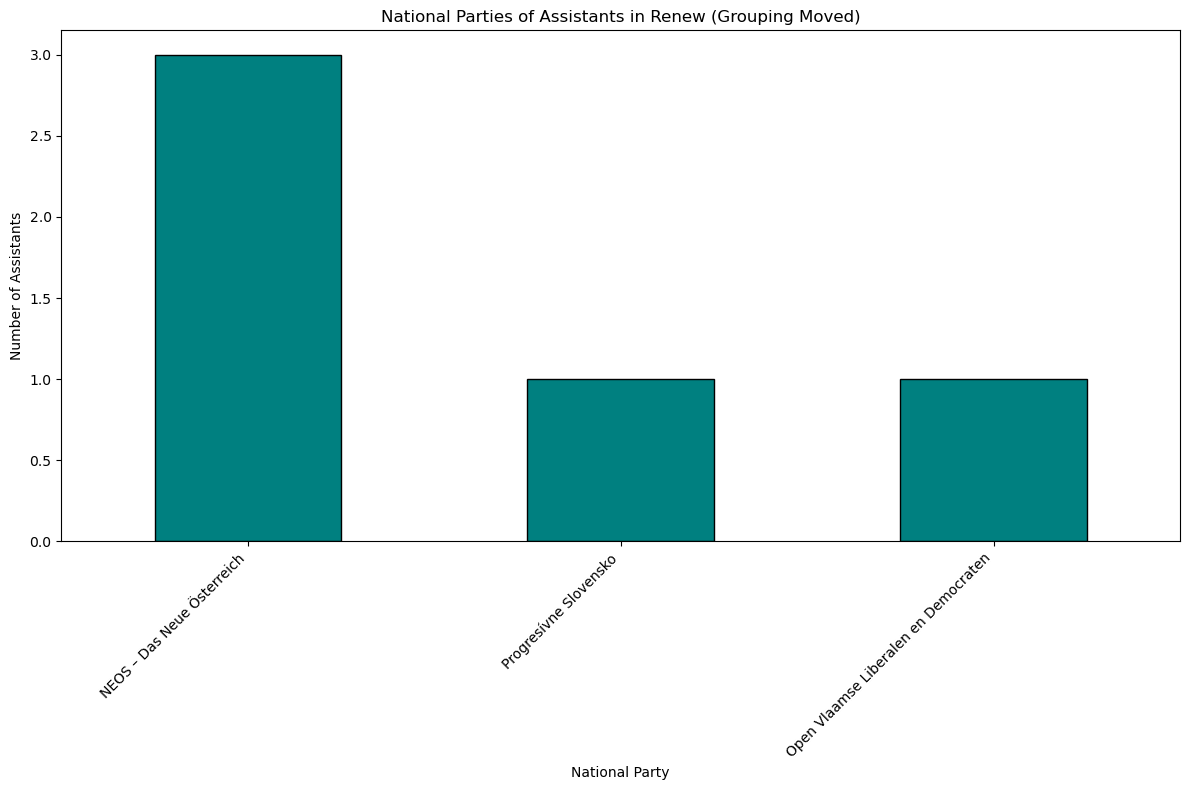

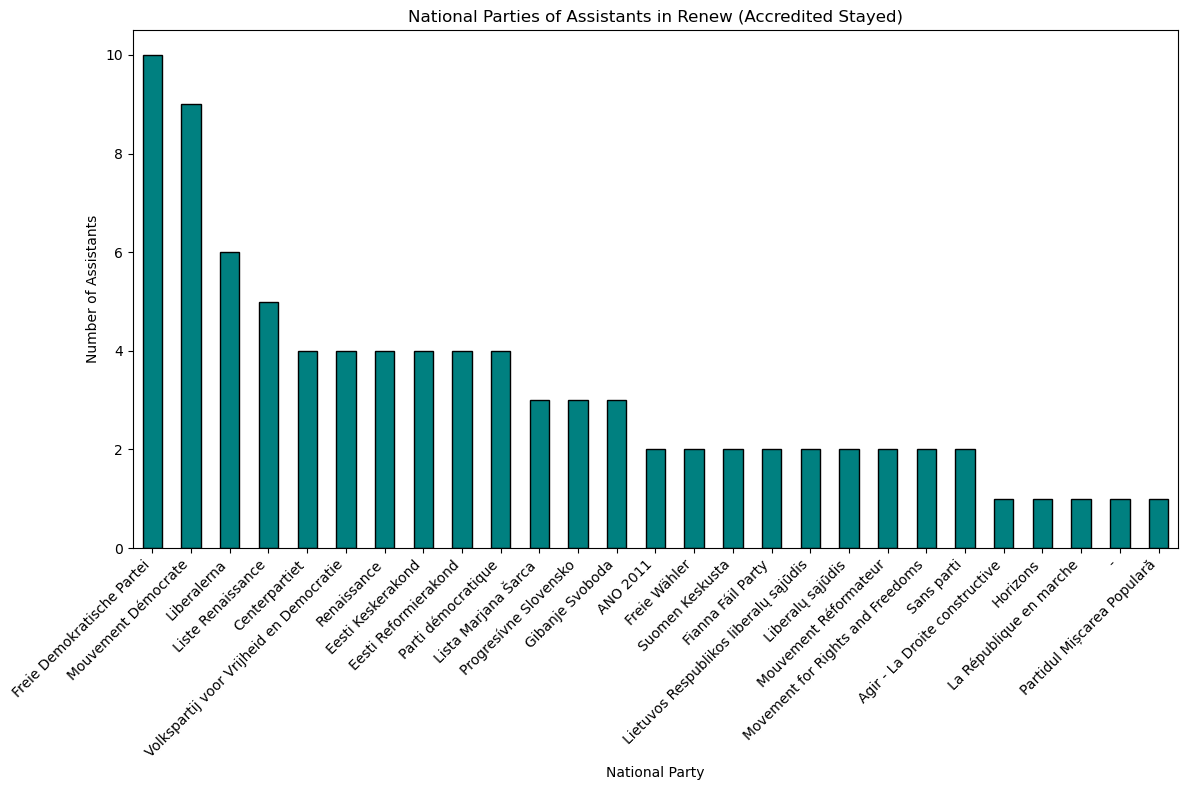

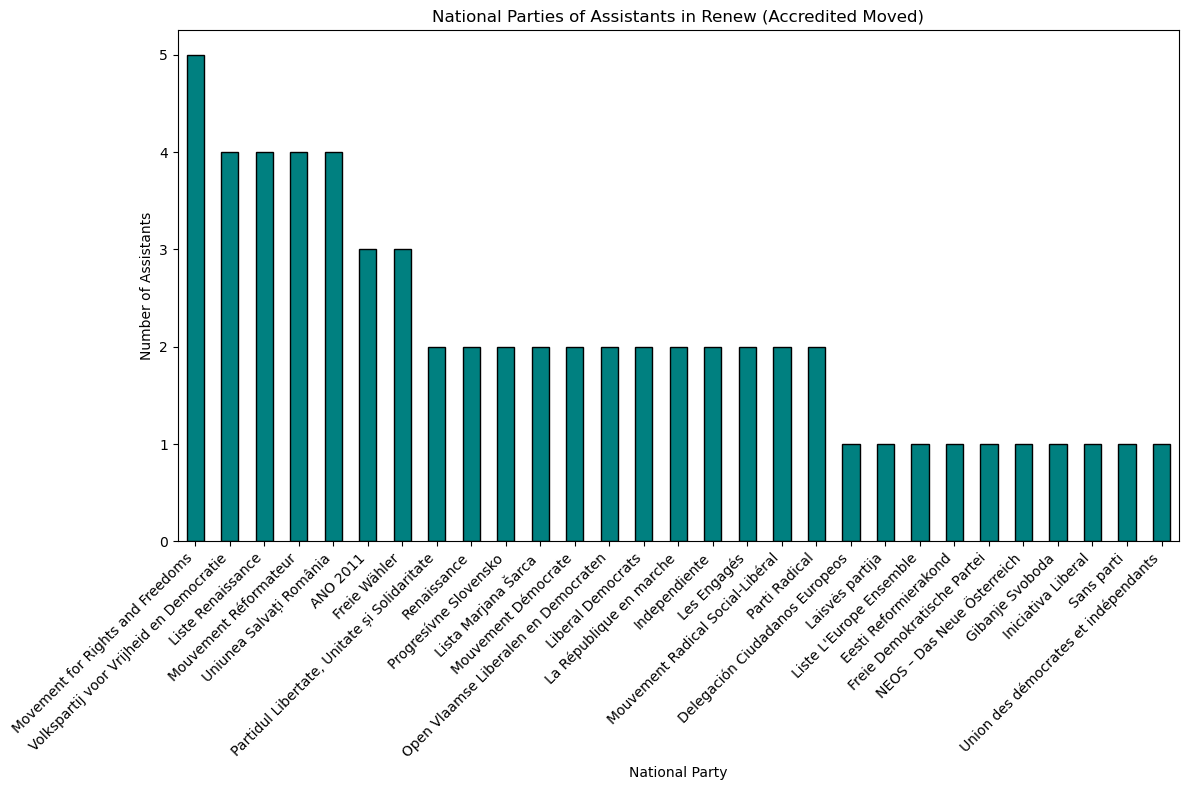

In [ ]:
# Helper function to aggregate national parties for a specific group and category
def aggregate_national_parties(data, group_abbr, mep_change_status):
    """
    Aggregate national parties for a specific political group and MEP change status.
    
    Parameters:
        data (DataFrame): The dataset to analyze.
        group_abbr (str): The political group abbreviation to filter on (e.g., 'S&D', 'EPP').
        mep_change_status (str): The MEP change status ('Moved' or 'Stayed').
    
    Returns:
        Series: Counts of national parties.
    """
    # Filter assistants by the MEP change status
    filtered = data[
        data['mep_change'] == mep_change_status
    ]
    
    # Ensure details_9 and details_10 are lists, handling NaN or other unexpected values
    national_parties = filtered.apply(
        lambda row: [
            rec['mep_party'] for rec in 
            (row.get('details_9', []) if isinstance(row.get('details_9', []), list) else []) + 
            (row.get('details_10', []) if isinstance(row.get('details_10', []), list) else [])
            if isinstance(rec, dict) and rec.get('group_abbr') == group_abbr
        ], axis=1
    )
    
    # Flatten the list of lists and filter out None values
    flat_list = [party for sublist in national_parties for party in sublist if party]
    
    # Return the value counts of national parties
    return pd.Series(flat_list).value_counts()

# Specify the combinations of group and category to analyze
combinations = [
    {'group': 'S&D', 'status': 'Moved', 'data': accredited_mep_mapping, 'title': 'S&D (Accredited Moved)'},
    {'group': 'S&D', 'status': 'Moved', 'data': accredited_grouping_mep_mapping, 'title': 'S&D (Grouping Moved)'},
    {'group': 'EPP', 'status': 'Stayed', 'data': accredited_mep_mapping, 'title': 'EPP (Accredited Stayed)'},
    {'group': 'EPP', 'status': 'Moved', 'data': accredited_mep_mapping, 'title': 'EPP (Accredited Moved)'},
    {'group': 'Patriots', 'status': 'Moved', 'data': accredited_grouping_mep_mapping, 'title': 'Partiots (Grouping Moved)'},
    {'group': 'ECR', 'status': 'Moved', 'data': accredited_grouping_mep_mapping, 'title': 'ECR (Grouping Moved)'},
    {'group': 'GUE/NGL', 'status': 'Moved', 'data': accredited_grouping_mep_mapping, 'title': 'GUE/NGL (Grouping Moved)'},
    {'group': 'GUE/NGL', 'status': 'Stayed', 'data': accredited_mep_mapping, 'title': 'GUE/NGL (Accredited Stayed)'}, 
    {'group': 'GUE/NGL', 'status': 'Moved', 'data': accredited_mep_mapping, 'title': 'GUE/NGL (Accredited Moved)'}, 
    {'group': 'Renew', 'status': 'Moved', 'data': accredited_grouping_mep_mapping, 'title': 'Renew (Grouping Moved)'},
    {'group': 'Renew', 'status': 'Stayed', 'data': accredited_mep_mapping, 'title': 'Renew (Accredited Stayed)'}, 
    {'group': 'Renew', 'status': 'Moved', 'data': accredited_mep_mapping, 'title': 'Renew (Accredited Moved)'}, 

]
# Loop through the combinations and generate bar charts
for combo in combinations:
    national_parties = aggregate_national_parties(combo['data'], combo['group'], combo['status'])
    
    # Plot the national party distribution
    plt.figure(figsize=(12, 8))
    national_parties.plot(kind='bar', color='teal', edgecolor='black')
    plt.title(f'National Parties of Assistants in {combo["title"]}')
    plt.xlabel('National Party')
    plt.ylabel('Number of Assistants')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

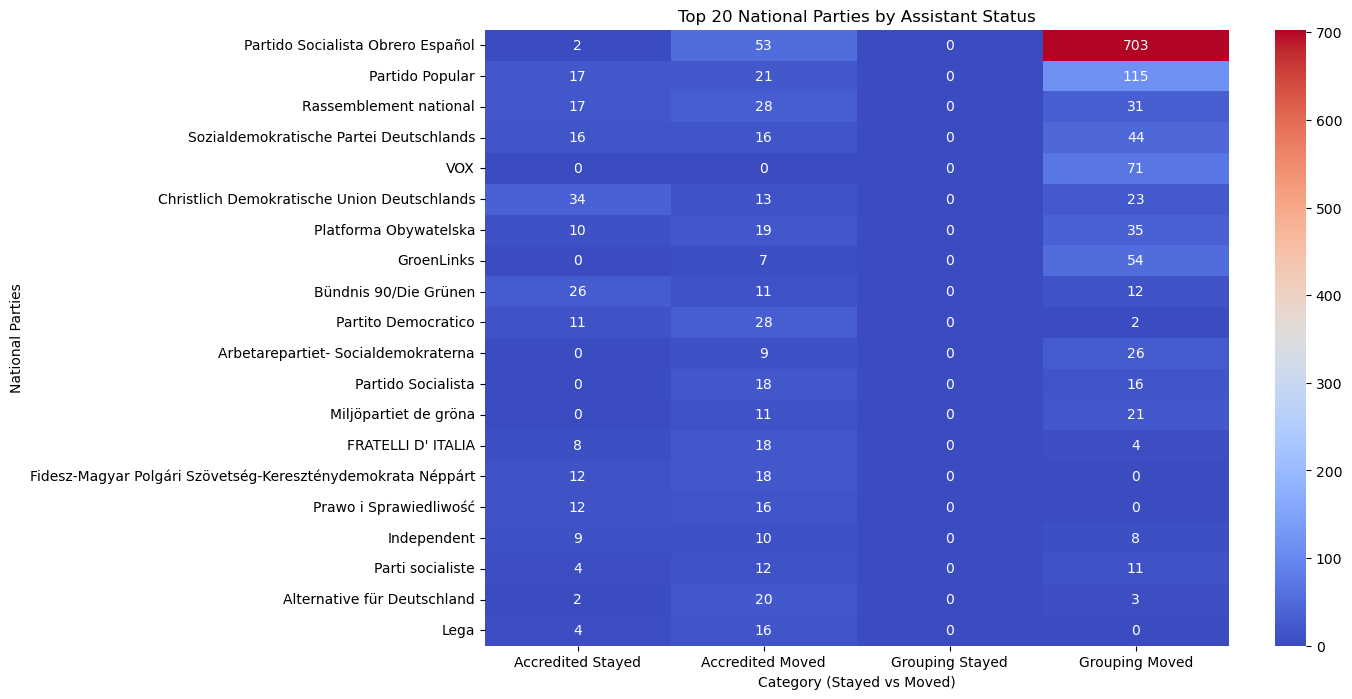

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Helper function to aggregate national parties
def aggregate_parties(data, status):
    """Aggregate national parties for stayed or moved assistants."""
    # Filter assistants based on 'Stayed' or 'Moved' status
    filtered = data[data['mep_change'] == status]

    # Ensure details_9 and details_10 are lists, handling NaN or other unexpected values
    party_counts = filtered.apply(
        lambda row: [
            rec['mep_party'] for rec in (row.get('details_9', []) if isinstance(row.get('details_9', []), list) else []) + 
            (row.get('details_10', []) if isinstance(row.get('details_10', []), list) else [])
        ], axis=1
    )

    # Flatten the list of lists and count occurrences of each national party
    flat_list = [party for sublist in party_counts for party in sublist]
    
    # Return the value counts of national parties
    return pd.Series(flat_list).value_counts()

# Verify that details_9 and details_10 exist in the accredited mappings
if 'details_9' in accredited_mep_mapping.columns and 'details_10' in accredited_mep_mapping.columns:
    accredited_stayed = aggregate_parties(accredited_mep_mapping, 'Stayed')
    accredited_moved = aggregate_parties(accredited_mep_mapping, 'Moved')
else:
    raise KeyError("details_9 and details_10 are missing in accredited_mep_mapping.")

if 'details_9' in accredited_grouping_mep_mapping.columns and 'details_10' in accredited_grouping_mep_mapping.columns:
    grouping_stayed = aggregate_parties(accredited_grouping_mep_mapping, 'Stayed')
    grouping_moved = aggregate_parties(accredited_grouping_mep_mapping, 'Moved')
else:
    raise KeyError("details_9 and details_10 are missing in accredited_grouping_mep_mapping.")

# Combine counts into a DataFrame for the heatmap
heatmap_data = pd.DataFrame({
    'Accredited Stayed': accredited_stayed,
    'Accredited Moved': accredited_moved,
    'Grouping Stayed': grouping_stayed,
    'Grouping Moved': grouping_moved
}).fillna(0)  # Fill NaN values with 0 for the heatmap

# Calculate the total number of assistants across all columns for each national party
party_totals = heatmap_data.sum(axis=1)

# Select the top N national parties based on the total number of assistants
N = 20  # Set the number of top parties you want to visualize
top_n_parties = party_totals.nlargest(N).index

# Filter the heatmap data to only include the top N national parties
filtered_heatmap_data = heatmap_data.loc[top_n_parties]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_heatmap_data, annot=True, cmap='coolwarm', fmt='.0f')
plt.title(f'Top {N} National Parties by Assistant Status')
plt.ylabel('National Parties')
plt.xlabel('Category (Stayed vs Moved)')
plt.show()

## 5.3 Movement by Country

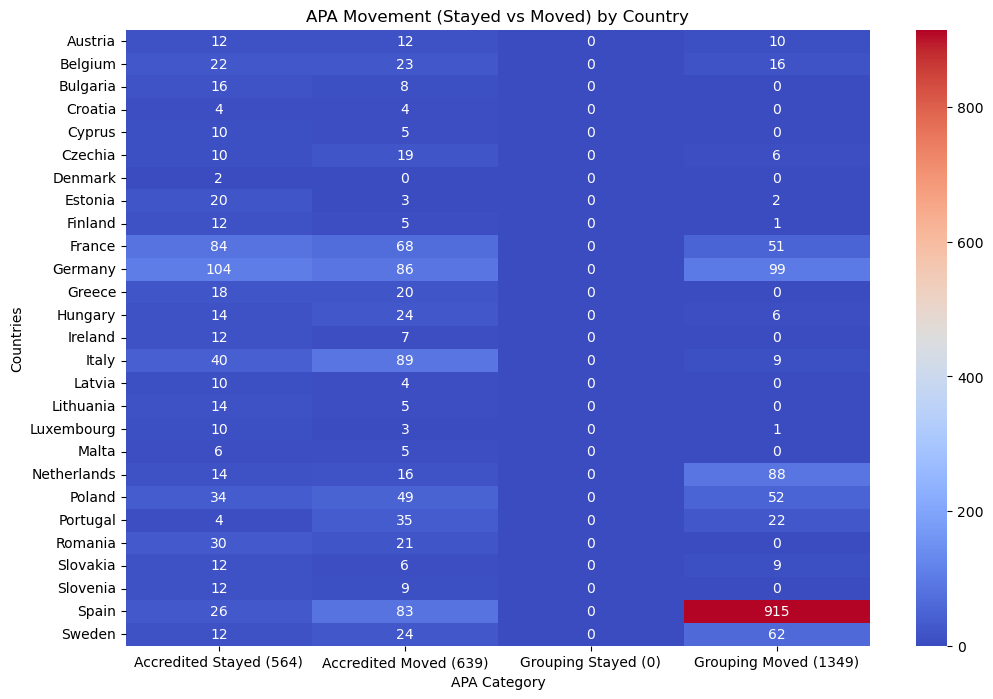

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Helper function to aggregate country counts
def aggregate_countries(data, status):
    """Aggregate countries for stayed or moved assistants."""
    # Filter assistants based on 'Stayed' or 'Moved' status
    filtered = data[data['mep_change'] == status]

    # Ensure details_9 and details_10 are lists, handling NaN or other unexpected values
    country_counts = filtered.apply(
        lambda row: [
            rec['country'] for rec in (row.get('details_9', []) if isinstance(row.get('details_9', []), list) else []) + 
            (row.get('details_10', []) if isinstance(row.get('details_10', []), list) else [])
        ], axis=1
    )

    # Flatten the list of lists and count occurrences of each country
    flat_list = [country for sublist in country_counts for country in sublist]
    
    # Return the value counts of countries
    return pd.Series(flat_list).value_counts()

# Verify that details_9 and details_10 exist in the accredited mappings
if 'details_9' in accredited_mep_mapping.columns and 'details_10' in accredited_mep_mapping.columns:
    accredited_stayed = aggregate_countries(accredited_mep_mapping, 'Stayed')
    accredited_moved = aggregate_countries(accredited_mep_mapping, 'Moved')
else:
    raise KeyError("details_9 and details_10 are missing in accredited_mep_mapping.")

if 'details_9' in accredited_grouping_mep_mapping.columns and 'details_10' in accredited_grouping_mep_mapping.columns:
    grouping_stayed = aggregate_countries(accredited_grouping_mep_mapping, 'Stayed')
    grouping_moved = aggregate_countries(accredited_grouping_mep_mapping, 'Moved')
else:
    raise KeyError("details_9 and details_10 are missing in accredited_grouping_mep_mapping.")

# Combine counts into a DataFrame for the heatmap
heatmap_data = pd.DataFrame({
    'Accredited Stayed': accredited_stayed,
    'Accredited Moved': accredited_moved,
    'Grouping Stayed': grouping_stayed,
    'Grouping Moved': grouping_moved
}).fillna(0)  # Fill NaN values with 0 for the heatmap

# Calculate totals for each column
totals = heatmap_data.sum(axis=0)

# Modify column names to include totals
heatmap_data.columns = [
    f"{col} ({int(total)})" for col, total in zip(heatmap_data.columns, totals)
]

# Plot the heatmap (excluding the total row from the color scale)
plt.figure(figsize=(12, 8))

# Exclude the "Total" row for the heatmap's color scaling
sns.heatmap(heatmap_data.iloc[:-1], annot=True, cmap='coolwarm', fmt='.0f')

# Title and labels
plt.title('APA Movement (Stayed vs Moved) by Country')
plt.ylabel('Countries')
plt.xlabel('APA Category')

# Show the plot
plt.show()

In [ ]:
# Helper function to classify movement
def refined_mep_change(row):
    details_9 = {mep['mep_name'] for mep in row.get('details_9', []) if isinstance(row.get('details_9', []), list)}
    details_10 = {mep['mep_name'] for mep in row.get('details_10', []) if isinstance(row.get('details_10', []), list)}
    
    if not details_10:  # If no data in details_10
        return 'Missing'
    elif details_9 & details_10:  # Intersection exists
        if details_9 == details_10:  # Sets are identical
            return 'Stayed'
        else:  # Partial overlap
            return 'Partially Moved'
    else:  # No intersection
        return 'Moved'

# Apply the refined logic
accredited_mep_mapping['refined_mep_change'] = accredited_mep_mapping.apply(refined_mep_change, axis=1)
accredited_grouping_mep_mapping['refined_mep_change'] = accredited_grouping_mep_mapping.apply(refined_mep_change, axis=1)

TypeError: 'float' object is not iterable

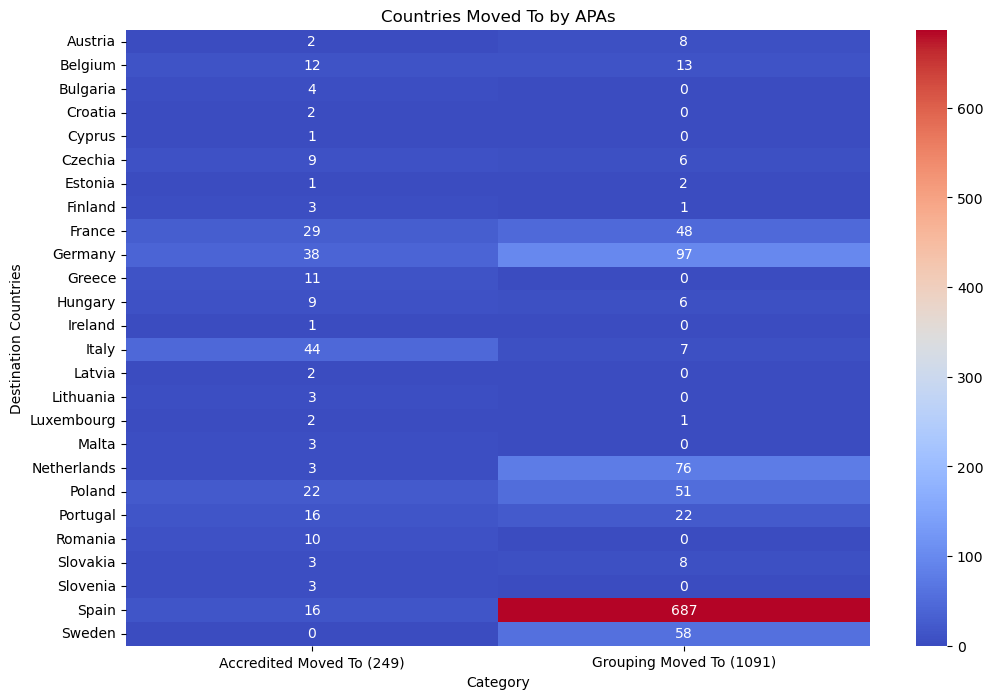

In [ ]:
# Helper function to aggregate destination countries for moved assistants
def aggregate_moved_to(data):
    """Aggregate destination countries for assistants who moved."""
    # Filter assistants based on 'Moved' status
    filtered = data[data['mep_change'] == 'Moved']

    # Extract destination countries from 'details_10', handling NaN or unexpected values
    destination_countries = filtered.apply(
        lambda row: [rec['country'] for rec in row.get('details_10', [])] 
        if isinstance(row.get('details_10', []), list) else [],
        axis=1
    )

    # Flatten the list of lists and count occurrences of each country
    flat_list = [country for sublist in destination_countries for country in sublist]
    
    # Return the value counts of destination countries
    return pd.Series(flat_list).value_counts()

# Verify that details_10 exists in the mappings
if 'details_10' in accredited_mep_mapping.columns:
    accredited_moved_to = aggregate_moved_to(accredited_mep_mapping)
else:
    raise KeyError("details_10 is missing in accredited_mep_mapping.")

if 'details_10' in accredited_grouping_mep_mapping.columns:
    grouping_moved_to = aggregate_moved_to(accredited_grouping_mep_mapping)
else:
    raise KeyError("details_10 is missing in accredited_grouping_mep_mapping.")

# Combine counts into a DataFrame for the heatmap
heatmap_data_moved_to = pd.DataFrame({
    'Accredited Moved To': accredited_moved_to,
    'Grouping Moved To': grouping_moved_to
}).fillna(0)  # Fill NaN values with 0 for the heatmap

# Calculate totals for each column (we'll add this at the bottom, but it won't be included in the heatmap)
totals_moved_to = heatmap_data_moved_to.sum(axis=0)

# Add a new row with the totals at the bottom of the DataFrame
heatmap_data_moved_to.loc['Total'] = totals_moved_to

# Modify column names to include totals
heatmap_data_moved_to.columns = [
    f"{col} ({int(total)})" for col, total in zip(heatmap_data_moved_to.columns, totals_moved_to)
]

# Plot the heatmap (excluding the total row from the color scale)
plt.figure(figsize=(12, 8))

# Exclude the "Total" row for the heatmap's color scaling
sns.heatmap(heatmap_data_moved_to.iloc[:-1], annot=True, cmap='coolwarm', fmt='.0f')

# Title and labels
plt.title('Countries Moved To by APAs')
plt.ylabel('Destination Countries')
plt.xlabel('Category')

# Show the plot
plt.show()

In [ ]:
accredited_multi = accredited_mep_mapping[accredited_mep_mapping['mep_change'] == 'Moved'].apply(
    lambda row: len(row['details_10']) if isinstance(row['details_10'], list) else 0, axis=1
).sum()

grouping_multi = accredited_grouping_mep_mapping[accredited_grouping_mep_mapping['mep_change'] == 'Moved'].apply(
    lambda row: len(row['details_10']) if isinstance(row['details_10'], list) else 0, axis=1
).sum()

print(f"Accredited 'Moved' multi-country count: {accredited_multi}")
print(f"Grouping 'Moved' multi-country count: {grouping_multi}")

Accredited 'Moved' multi-country count: 249
Grouping 'Moved' multi-country count: 1091


In [ ]:
accredited_moved_individuals = accredited_mep_mapping[accredited_mep_mapping['mep_change'] == 'Moved'].shape[0]
grouping_moved_individuals = accredited_grouping_mep_mapping[accredited_grouping_mep_mapping['mep_change'] == 'Moved'].shape[0]

print(f"Accredited unique individuals moved: {accredited_moved_individuals}")
print(f"Grouping unique individuals moved: {grouping_moved_individuals}")


Accredited unique individuals moved: 342
Grouping unique individuals moved: 130


In [ ]:
accredited_missing = accredited_mep_mapping['details_10'].isnull().sum()
grouping_missing = accredited_grouping_mep_mapping['details_10'].isnull().sum()

print(f"Missing destination data in Accredited: {accredited_missing}")
print(f"Missing destination data in Grouping: {grouping_missing}")


Missing destination data in Accredited: 93
Missing destination data in Grouping: 10


In [ ]:
# Filter rows with missing details_10
accredited_missing_rows = accredited_mep_mapping[accredited_mep_mapping['details_10'].isnull()]
grouping_missing_rows = accredited_grouping_mep_mapping[accredited_grouping_mep_mapping['details_10'].isnull()]

# Display a sample
print(accredited_missing_rows.head())
print(grouping_missing_rows.head())

term                                                          9  10  \
assistant_name                                                        
AINA ARROM MAYOL                            {Alicia HOMS GINEL}  {}   
AMANDA ELISABET ANNIE ARLEKLO                    {Alice KUHNKE}  {}   
ANA LÓPEZ GONZÁLEZ                          {Alicia HOMS GINEL}  {}   
Agnes POPOVICS                                   {Sándor RÓNAI}  {}   
Alejandro PEINADO GARCIA       {César LUENA, Alicia HOMS GINEL}  {}   

term                           mep_stayed mep_change  \
assistant_name                                         
AINA ARROM MAYOL                    False      Moved   
AMANDA ELISABET ANNIE ARLEKLO       False      Moved   
ANA LÓPEZ GONZÁLEZ                  False      Moved   
Agnes POPOVICS                      False      Moved   
Alejandro PEINADO GARCIA            False      Moved   

term                                                                   details_9  \
assistant_name           

# 6. which MEP changed most

In [ ]:
import pandas as pd

df = filtered_apas_both_terms

# Step 1: Group by MEP, assistant_type, and term, then count unique assistants
assistant_changes = (
    df.groupby(['mep_name', 'assistant_type', 'term'])['assistant_name']
    .nunique()
    .reset_index(name='unique_assistants')
)

# Step 2: Analyze changes by MEP and assistant type
# Count the number of unique assistants per MEP and assistant type across terms
assistant_change_summary = (
    assistant_changes.groupby(['mep_name', 'assistant_type'])['unique_assistants']
    .sum()
    .reset_index(name='total_assistant_changes')
)

# Step 3: Find the MEPs with the most assistant changes
# Sort the results by total_assistant_changes in descending order
most_changes = assistant_change_summary.sort_values(
    by='total_assistant_changes', ascending=False
)

# Split the analysis by assistant type for detailed breakdown
accredited_changes = most_changes[most_changes['assistant_type'] == 'accredited']
grouping_changes = most_changes[most_changes['assistant_type'] == 'accredited_grouping']

# Output results
print("Top MEPs with the most assistant changes (Overall):")
print(most_changes.head(10))

print("\nTop MEPs with the most accredited assistant changes:")
print(accredited_changes.head(10))

print("\nTop MEPs with the most grouping assistant changes:")
print(grouping_changes.head(10))

Top MEPs with the most assistant changes (Overall):
                        mep_name       assistant_type  total_assistant_changes
484                  Lina GÁLVEZ  accredited_grouping                       57
34             Alicia HOMS GINEL  accredited_grouping                       57
622     Nicolás GONZÁLEZ CASARES  accredited_grouping                       54
612           Nacho SÁNCHEZ AMOR  accredited_grouping                       52
351          Iratxe GARCÍA PÉREZ  accredited_grouping                       51
179             Cristina MAESTRE  accredited_grouping                       50
419  Juan Fernando LÓPEZ AGUILAR  accredited_grouping                       43
388        Javier MORENO SÁNCHEZ  accredited_grouping                       43
186                  César LUENA  accredited_grouping                       29
718          Rosa SERRANO SIERRA  accredited_grouping                       29

Top MEPs with the most accredited assistant changes:
              mep_name as